In [1]:
import pandas as pd  
import pickle 
import numpy as np 
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import  matplotlib.pyplot as plt 
import seaborn as sns
#from confusion_matrix_pretty_print import *


In [2]:
df=pd.read_csv('train_knn_bd_data.csv')
x_train=df.drop(columns='Last__birth_a_caesarean_section_label')
y_train=df['Last__birth_a_caesarean_section_label']

In [3]:
df1=pd.read_csv('test_knn_bd_data.csv')
x_test=df1.drop(columns='Last__birth_a_caesarean_section_label')
y_test=df1['Last__birth_a_caesarean_section_label']

In [4]:
df_main=pd.read_csv('Bangladesh Non-categorized data prepossed(knn).csv')
df_main.drop(columns='Unnamed: 0',inplace=True)
df_main

,Type_of_place_of_residence,Age_of_Mother,Mothers_BMI,Mothers_Educational_level,Mothers_occupation,Number_of_ANC_visits,Total_Number_of_ever_born_child,Ever_had_a_terminated_pregnancy,Decision_Making_Power_on_Delivery_place,Waching_TV,Husbands_Education,Husbands_Occupation,Household_Wealth_Quintile,Sources_of_Drinking_Water,Household_Toilet_Facility,Last__birth_a_caesarean_section_label
0,2.000000,25.000000,29.580000,2.000000,0.000000,3.600000,3.000000,0.000000,2.0,0.0,2.000000,4.000000,4.000000,0.0,0.000000,0.0
1,2.000000,20.000000,25.860000,1.000000,1.000000,2.000000,1.000000,0.000000,1.0,0.0,1.000000,4.000000,0.000000,1.0,0.000000,0.0
2,2.000000,21.000000,18.510000,1.000000,1.000000,1.400000,3.000000,0.000000,1.0,0.0,1.000000,1.000000,1.000000,1.0,1.000000,0.0
3,2.000000,21.000000,25.980000,2.000000,1.000000,6.000000,1.000000,0.000000,1.0,0.0,1.000000,4.000000,0.000000,1.0,0.000000,0.0
4,2.000000,19.000000,36.800000,3.000000,0.000000,3.000000,1.000000,0.000000,1.0,1.0,2.000000,4.000000,2.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7345,2.000000,23.000000,17.040000,1.000000,0.000000,1.189741,2.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000,1.0
7346,1.000000,23.000000,22.714790,1.413827,0.000000,5.413827,1.586173,0.586173,1.0,1.0,3.000000,4.000000,4.000000,1.0,0.413827,1.0
7347,1.000000,23.795833,31.015625,2.000000,0.000000,6.000000,2.000000,0.204167,1.0,1.0,2.000000,2.795833,4.000000,1.0,1.000000,1.0
7348,1.000000,29.000000,33.579703,2.000000,0.957658,8.915315,1.042342,0.957658,1.0,1.0,1.042342,4.000000,4.000000,1.0,1.000000,1.0


In [5]:
x=df_main.drop(columns='Last__birth_a_caesarean_section_label')
y=df_main['Last__birth_a_caesarean_section_label']

In [6]:
rf_clf=pickle.load(open('ORF_final_bd.sav','rb'))

C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [7]:
pred=rf_clf.predict(x_test)

In [14]:
cohen_kappa_score(y_test,pred)
accuracy_score(y_test,pred
              )

0.8471164309031556

In [9]:
op_pra={'criterion': 'gini',
 'n_estimators': 550,
 'max_features': 0.15491940474457963,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_samples': 0.8703469172121624}

In [10]:
rf1=RandomForestClassifier(**op_pra,random_state=99,n_jobs=-1)

In [11]:
rf1.fit(x_train,y_train)

RandomForestClassifier(max_features=0.15491940474457963,
                       max_samples=0.8703469172121624, min_samples_split=3,
                       n_estimators=550, n_jobs=-1, random_state=99)

In [12]:
pred_new=rf1.predict(x_test)

In [13]:
accuracy_score(y_test,pred)

0.8471164309031556

In [18]:
link= "E:/ML/Hypertension & Csection/C section/bangladeshi/images/"

In [15]:
#pickle.dump(rf1,open('ORF_final_bd.sav','wb'))

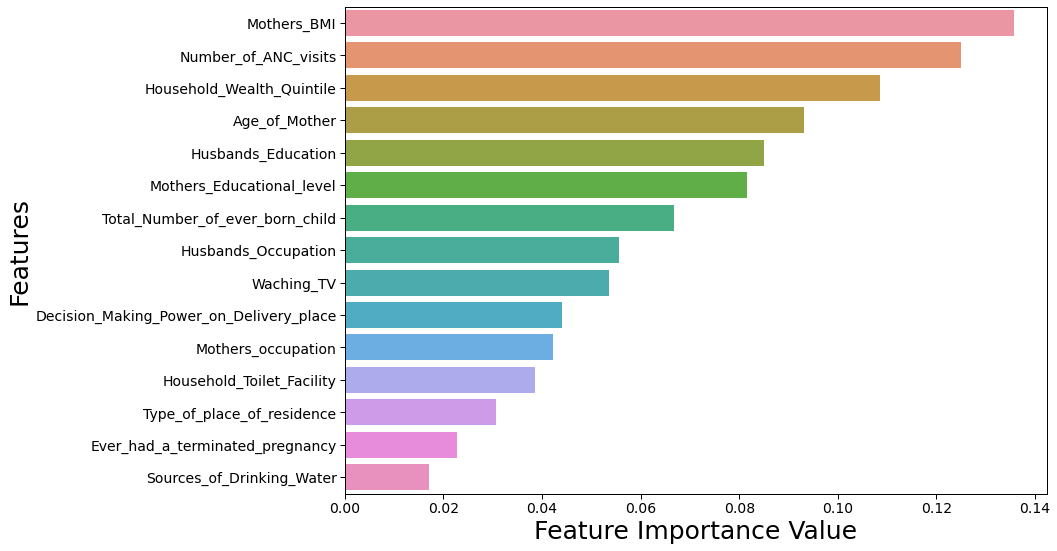

In [20]:
sns.set_context("paper", rc={"font.size": 18,"axes.titlesize":20,"axes.labelsize":20})

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams.update({'font.size': 18})
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(rf1.feature_importances_,x_test.columns)), columns=['Feature Importance Value','Features'])
params = {'axes.labelsize': 25}
plt.rcParams.update(params)
fig,ax=plt.subplots(figsize=(15, 8))

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=15)
sns.barplot(x="Feature Importance Value", y="Features", data=feature_imp.sort_values(by="Feature Importance Value", ascending=False))
#plt.title('LightGBM Features (avg over folds)')

plt.tight_layout()

plt.savefig(link+'RF_importances_fresh.png')
plt.show()

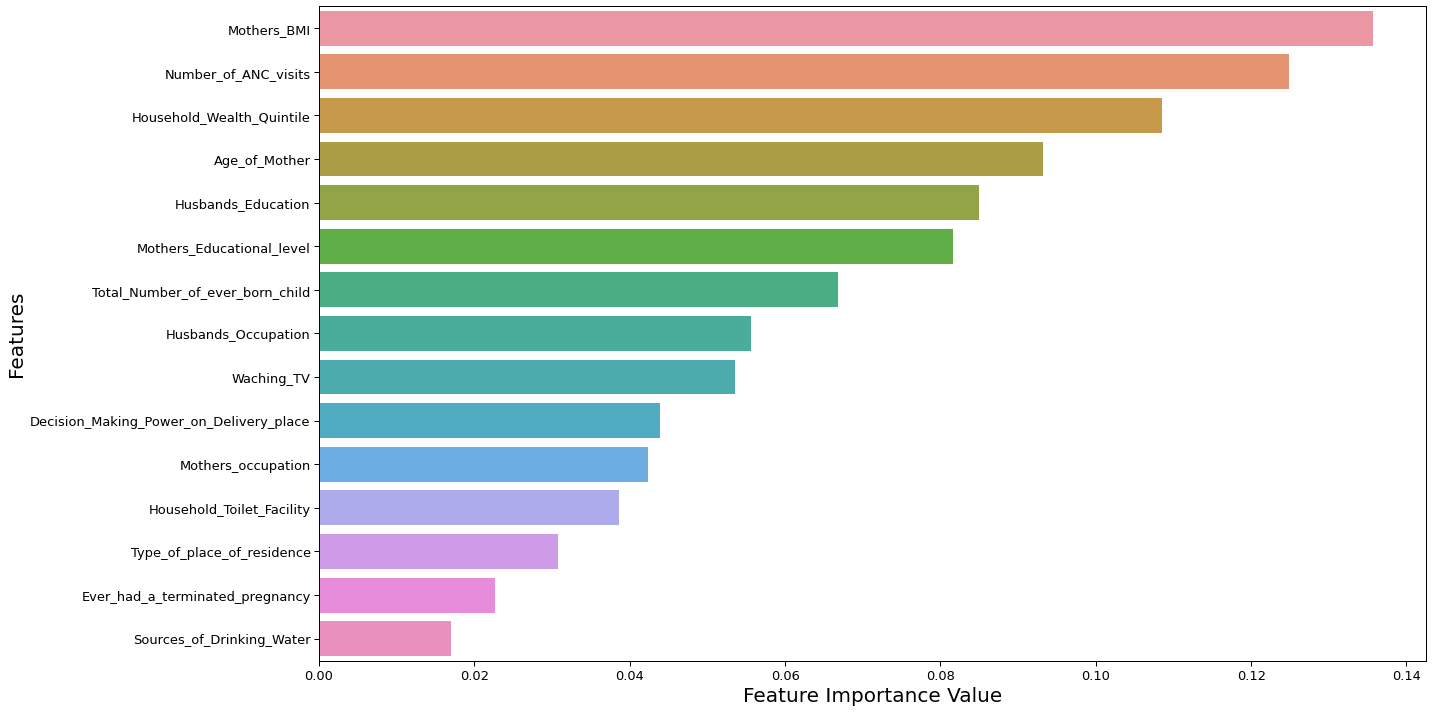

In [16]:
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":20})

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(rf1.feature_importances_,x_test.columns)), columns=['Feature Importance Value','Features'])

fig,ax=plt.subplots(figsize=(20, 10))
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
sns.barplot(x="Feature Importance Value", y="Features", data=feature_imp.sort_values(by="Feature Importance Value", ascending=False))
#plt.title('LightGBM Features (avg over folds)')

plt.tight_layout()

plt.savefig('RF_importances-01.eps')
plt.show()

In [137]:
import numpy as np
test_bd_csection=np.array(y_test)
np.save('test_bd_csection.npy',test_bd_csection)


In [63]:
for i, (name, height) in enumerate(zip(fea_list,fea_value)):
    print(i,name,height)

0 Mothers_BMI 0.1327341090927196
1 Number_of_ANC_visits 0.12648064190313302
2 Household_Wealth_Quintile 0.10532779387858916
3 Age_of_Mother 0.0935243911563686
4 Husbands_Education 0.08510379929492488
5 Mothers_Educational_level 0.08403323499290954
6 Total_Number_of_ever_born_child 0.06470107720616128
7 Waching_TV 0.05844451324077158
8 Husbands_Occupation 0.05464335654844644
9 Decision_Making_Power_on_Delivery_place 0.04353117356992164
10 Mothers_occupation 0.04176374851105316
11 Household_Toilet_Facility 0.03857872262442686
12 Type_of_place_of_residence 0.03116247619605357
13 Ever_had_a_terminated_pregnancy 0.022757484870126913
14 Sources_of_Drinking_Water 0.017213476914393643


In [102]:
%run confusion_matrix_pretty_print.ipynb

<ipython-input-102-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


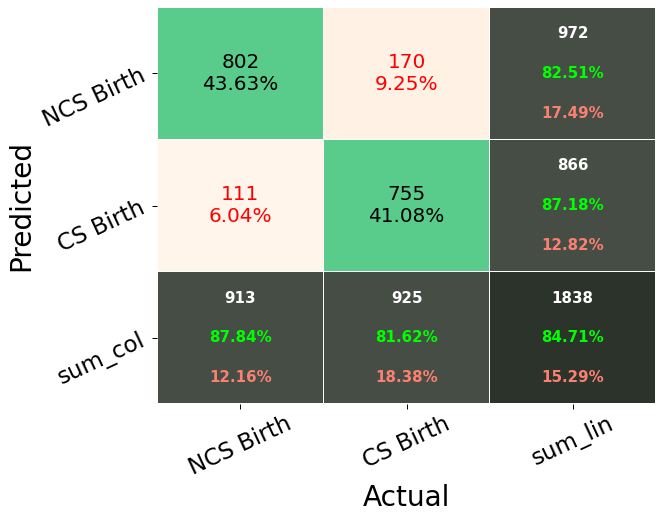

In [105]:

plot_confusion_matrix_from_data(y_test,pred,columns=['NCS Birth','CS Birth'],fz=20,filename= link+'Csection_new_cm.eps',figsize=[10,8])

In [24]:
lgbm1=pickle.load(open('LGBM_normal_bd_final.sav','rb'))

C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


<ipython-input-102-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


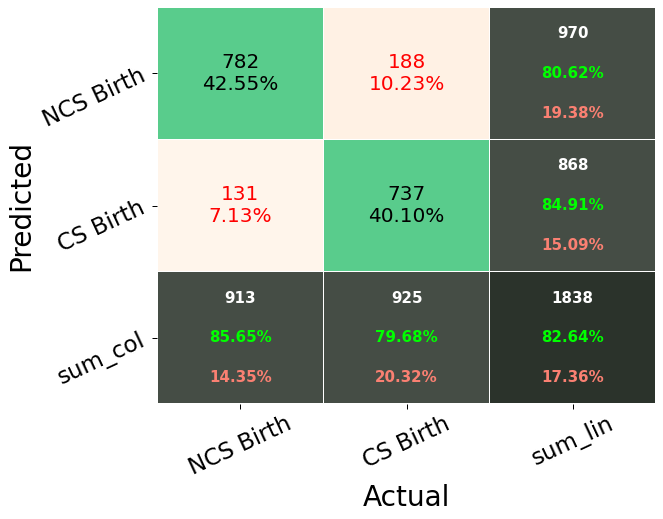

In [107]:
pred_lgbm=lgbm1.predict(x_test)



plot_confusion_matrix_from_data(y_test,pred_lgbm,columns=['NCS Birth','CS Birth'],fz=20,filename= link+'Csection_new_lgbm1.png',figsize=[10,8])

In [27]:
cat_clf=pickle.load(open('cat_boost_bd_final.sav','rb'))

<ipython-input-102-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


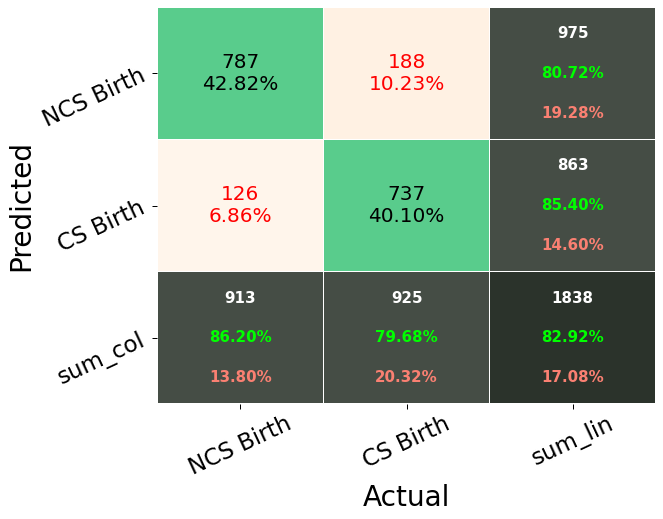

In [109]:
pred_cat=cat_clf.predict(x_test)



plot_confusion_matrix_from_data(y_test,pred_cat,columns=['NCS Birth','CS Birth'],fz=20,filename= link+'Csection_new_cat.png',figsize=[10,8])

In [30]:
gbc_clf=pickle.load(open('GBC_bd_final.sav','rb'))

C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


<ipython-input-102-11030cc71fb8>:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]


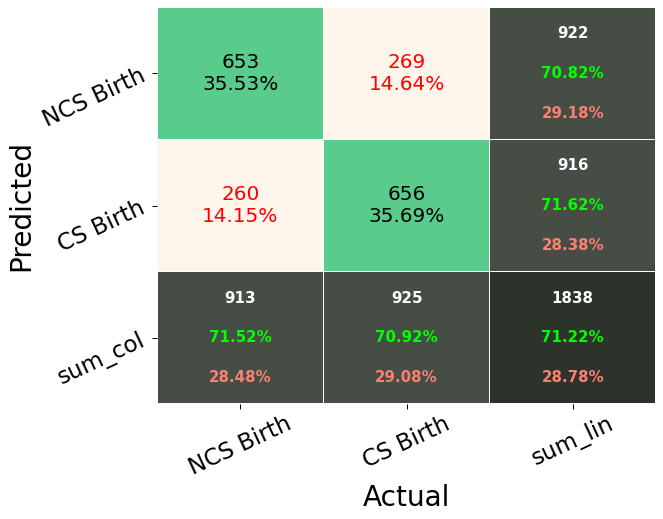

In [111]:
pred_gbc=gbc_clf.predict(x_test)



plot_confusion_matrix_from_data(y_test,pred_gbc,columns=['NCS Birth','CS Birth'],fz=20,filename= link+'Csection_new_gnb.eps',figsize=[10,8])

In [35]:
x_train_new=x_train
y_train_new=y_train
x_test_new=x_test
y_test_new=y_test

In [36]:
from sklearn.model_selection import cross_val_score

In [38]:
def est(clf,names):
    estm=[]
    for i in range(len(clf)):
        n=names[i]
        claf=clf[i]
        estm.append((n,claf))
    return estm
clf=[rf1,lgbm1,gbc_clf,cat_clf]
name=['ORF','LGBM','GNB','CB']
est_1=est(clf,name)
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}


for algorithm, model in est_1:
    y_pred = model.predict(x_test_new)
    y_prob = model.predict_proba(x_test_new)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob
    
    cross_val_scores[algorithm] = cross_val_score(model, x_train_new, y_train_new, cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test_new, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test_new, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test_new, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test_new, y_pred)
    ppv_scores[algorithm] = precision_score(y_test_new, y_pred, average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test_new, y_pred, average="weighted")
    confusion_matrix_= confusion_matrix(y_test_new, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)  
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP/(FP+TN)).mean()
    specificity_scores[algorithm] = (TN/(TN+FP)).mean()
    threat_scores[algorithm] = (TP/(TP+FN+FP)).mean()
    balanced_accuracy_scores[algorithm] = ((sensitivity_scores[algorithm] + specificity_scores[algorithm])/2).mean()
    print('done for :',algorithm)



done for : ORF
done for : LGBM
done for : GB
Learning rate set to 0.020413
0:	learn: 0.6861083	total: 346ms	remaining: 5m 45s
1:	learn: 0.6785724	total: 352ms	remaining: 2m 55s
2:	learn: 0.6718955	total: 359ms	remaining: 1m 59s
3:	learn: 0.6635950	total: 364ms	remaining: 1m 30s
4:	learn: 0.6569826	total: 370ms	remaining: 1m 13s
5:	learn: 0.6516316	total: 377ms	remaining: 1m 2s
6:	learn: 0.6436620	total: 383ms	remaining: 54.3s
7:	learn: 0.6374366	total: 389ms	remaining: 48.2s
8:	learn: 0.6322059	total: 395ms	remaining: 43.5s
9:	learn: 0.6266357	total: 401ms	remaining: 39.7s
10:	learn: 0.6206846	total: 407ms	remaining: 36.6s
11:	learn: 0.6161964	total: 413ms	remaining: 34s
12:	learn: 0.6107829	total: 418ms	remaining: 31.8s
13:	learn: 0.6051093	total: 424ms	remaining: 29.9s
14:	learn: 0.6011417	total: 430ms	remaining: 28.2s
15:	learn: 0.5957114	total: 436ms	remaining: 26.8s
16:	learn: 0.5902832	total: 442ms	remaining: 25.6s
17:	learn: 0.5856282	total: 448ms	remaining: 24.4s
18:	learn: 0.5

171:	learn: 0.4003752	total: 1.66s	remaining: 7.99s
172:	learn: 0.3999932	total: 1.67s	remaining: 7.97s
173:	learn: 0.3997229	total: 1.68s	remaining: 7.96s
174:	learn: 0.3994248	total: 1.68s	remaining: 7.94s
175:	learn: 0.3991776	total: 1.69s	remaining: 7.91s
176:	learn: 0.3988313	total: 1.7s	remaining: 7.89s
177:	learn: 0.3984743	total: 1.7s	remaining: 7.87s
178:	learn: 0.3981601	total: 1.71s	remaining: 7.84s
179:	learn: 0.3978591	total: 1.72s	remaining: 7.82s
180:	learn: 0.3975043	total: 1.72s	remaining: 7.79s
181:	learn: 0.3972109	total: 1.73s	remaining: 7.76s
182:	learn: 0.3968295	total: 1.73s	remaining: 7.74s
183:	learn: 0.3964438	total: 1.74s	remaining: 7.71s
184:	learn: 0.3960702	total: 1.75s	remaining: 7.69s
185:	learn: 0.3957937	total: 1.75s	remaining: 7.67s
186:	learn: 0.3955666	total: 1.76s	remaining: 7.64s
187:	learn: 0.3952189	total: 1.76s	remaining: 7.62s
188:	learn: 0.3947872	total: 1.77s	remaining: 7.59s
189:	learn: 0.3944143	total: 1.77s	remaining: 7.57s
190:	learn: 0.

335:	learn: 0.3568045	total: 2.75s	remaining: 5.43s
336:	learn: 0.3566142	total: 2.76s	remaining: 5.42s
337:	learn: 0.3564038	total: 2.76s	remaining: 5.41s
338:	learn: 0.3562032	total: 2.77s	remaining: 5.4s
339:	learn: 0.3559699	total: 2.77s	remaining: 5.39s
340:	learn: 0.3558531	total: 2.78s	remaining: 5.38s
341:	learn: 0.3557256	total: 2.79s	remaining: 5.36s
342:	learn: 0.3555363	total: 2.79s	remaining: 5.35s
343:	learn: 0.3552387	total: 2.8s	remaining: 5.34s
344:	learn: 0.3550655	total: 2.81s	remaining: 5.33s
345:	learn: 0.3547929	total: 2.81s	remaining: 5.32s
346:	learn: 0.3546925	total: 2.82s	remaining: 5.3s
347:	learn: 0.3544654	total: 2.82s	remaining: 5.29s
348:	learn: 0.3542203	total: 2.83s	remaining: 5.28s
349:	learn: 0.3540822	total: 2.84s	remaining: 5.27s
350:	learn: 0.3538724	total: 2.84s	remaining: 5.25s
351:	learn: 0.3535995	total: 2.85s	remaining: 5.24s
352:	learn: 0.3532781	total: 2.85s	remaining: 5.23s
353:	learn: 0.3529933	total: 2.86s	remaining: 5.22s
354:	learn: 0.3

504:	learn: 0.3230506	total: 3.86s	remaining: 3.78s
505:	learn: 0.3228346	total: 3.87s	remaining: 3.77s
506:	learn: 0.3225958	total: 3.87s	remaining: 3.77s
507:	learn: 0.3223890	total: 3.88s	remaining: 3.76s
508:	learn: 0.3222460	total: 3.88s	remaining: 3.75s
509:	learn: 0.3220608	total: 3.89s	remaining: 3.74s
510:	learn: 0.3218237	total: 3.9s	remaining: 3.73s
511:	learn: 0.3216579	total: 3.9s	remaining: 3.72s
512:	learn: 0.3214325	total: 3.91s	remaining: 3.71s
513:	learn: 0.3212428	total: 3.92s	remaining: 3.7s
514:	learn: 0.3210882	total: 3.92s	remaining: 3.69s
515:	learn: 0.3209005	total: 3.93s	remaining: 3.68s
516:	learn: 0.3207500	total: 3.93s	remaining: 3.67s
517:	learn: 0.3206287	total: 3.94s	remaining: 3.67s
518:	learn: 0.3205067	total: 3.95s	remaining: 3.66s
519:	learn: 0.3203315	total: 3.95s	remaining: 3.65s
520:	learn: 0.3201095	total: 3.96s	remaining: 3.64s
521:	learn: 0.3198547	total: 3.96s	remaining: 3.63s
522:	learn: 0.3196357	total: 3.97s	remaining: 3.62s
523:	learn: 0.3

675:	learn: 0.2960693	total: 4.95s	remaining: 2.37s
676:	learn: 0.2959006	total: 4.96s	remaining: 2.37s
677:	learn: 0.2957305	total: 4.96s	remaining: 2.36s
678:	learn: 0.2955905	total: 4.97s	remaining: 2.35s
679:	learn: 0.2954986	total: 4.98s	remaining: 2.34s
680:	learn: 0.2953397	total: 4.98s	remaining: 2.33s
681:	learn: 0.2951699	total: 4.99s	remaining: 2.33s
682:	learn: 0.2950366	total: 5s	remaining: 2.32s
683:	learn: 0.2949255	total: 5s	remaining: 2.31s
684:	learn: 0.2948155	total: 5.01s	remaining: 2.3s
685:	learn: 0.2946670	total: 5.01s	remaining: 2.29s
686:	learn: 0.2945540	total: 5.02s	remaining: 2.29s
687:	learn: 0.2943062	total: 5.03s	remaining: 2.28s
688:	learn: 0.2941539	total: 5.03s	remaining: 2.27s
689:	learn: 0.2940127	total: 5.04s	remaining: 2.26s
690:	learn: 0.2938628	total: 5.04s	remaining: 2.26s
691:	learn: 0.2937521	total: 5.05s	remaining: 2.25s
692:	learn: 0.2936972	total: 5.06s	remaining: 2.24s
693:	learn: 0.2935430	total: 5.06s	remaining: 2.23s
694:	learn: 0.29338

843:	learn: 0.2742044	total: 6.04s	remaining: 1.12s
844:	learn: 0.2740770	total: 6.05s	remaining: 1.11s
845:	learn: 0.2739335	total: 6.05s	remaining: 1.1s
846:	learn: 0.2737913	total: 6.06s	remaining: 1.09s
847:	learn: 0.2737293	total: 6.07s	remaining: 1.09s
848:	learn: 0.2736147	total: 6.07s	remaining: 1.08s
849:	learn: 0.2734816	total: 6.08s	remaining: 1.07s
850:	learn: 0.2733390	total: 6.08s	remaining: 1.06s
851:	learn: 0.2732139	total: 6.09s	remaining: 1.06s
852:	learn: 0.2730597	total: 6.1s	remaining: 1.05s
853:	learn: 0.2728782	total: 6.1s	remaining: 1.04s
854:	learn: 0.2727157	total: 6.11s	remaining: 1.04s
855:	learn: 0.2725636	total: 6.12s	remaining: 1.03s
856:	learn: 0.2724548	total: 6.12s	remaining: 1.02s
857:	learn: 0.2723121	total: 6.13s	remaining: 1.01s
858:	learn: 0.2721943	total: 6.13s	remaining: 1.01s
859:	learn: 0.2720631	total: 6.14s	remaining: 999ms
860:	learn: 0.2719322	total: 6.14s	remaining: 992ms
861:	learn: 0.2718849	total: 6.15s	remaining: 985ms
862:	learn: 0.2

22:	learn: 0.5724858	total: 184ms	remaining: 7.83s
23:	learn: 0.5693790	total: 191ms	remaining: 7.75s
24:	learn: 0.5664903	total: 198ms	remaining: 7.74s
25:	learn: 0.5637050	total: 207ms	remaining: 7.75s
26:	learn: 0.5589297	total: 219ms	remaining: 7.88s
27:	learn: 0.5554078	total: 228ms	remaining: 7.93s
28:	learn: 0.5518685	total: 236ms	remaining: 7.89s
29:	learn: 0.5481752	total: 246ms	remaining: 7.94s
30:	learn: 0.5449177	total: 253ms	remaining: 7.9s
31:	learn: 0.5420368	total: 263ms	remaining: 7.95s
32:	learn: 0.5396265	total: 270ms	remaining: 7.9s
33:	learn: 0.5373383	total: 280ms	remaining: 7.95s
34:	learn: 0.5345742	total: 287ms	remaining: 7.9s
35:	learn: 0.5325255	total: 297ms	remaining: 7.95s
36:	learn: 0.5299009	total: 304ms	remaining: 7.9s
37:	learn: 0.5270332	total: 314ms	remaining: 7.95s
38:	learn: 0.5243786	total: 320ms	remaining: 7.89s
39:	learn: 0.5222231	total: 330ms	remaining: 7.92s
40:	learn: 0.5194222	total: 336ms	remaining: 7.87s
41:	learn: 0.5170449	total: 345ms	r

210:	learn: 0.3879349	total: 1.45s	remaining: 5.43s
211:	learn: 0.3876558	total: 1.46s	remaining: 5.43s
212:	learn: 0.3873928	total: 1.47s	remaining: 5.42s
213:	learn: 0.3871853	total: 1.47s	remaining: 5.41s
214:	learn: 0.3869581	total: 1.48s	remaining: 5.4s
215:	learn: 0.3866540	total: 1.49s	remaining: 5.39s
216:	learn: 0.3864448	total: 1.49s	remaining: 5.38s
217:	learn: 0.3861797	total: 1.5s	remaining: 5.38s
218:	learn: 0.3858994	total: 1.5s	remaining: 5.37s
219:	learn: 0.3855064	total: 1.51s	remaining: 5.35s
220:	learn: 0.3852451	total: 1.52s	remaining: 5.35s
221:	learn: 0.3850601	total: 1.52s	remaining: 5.34s
222:	learn: 0.3847850	total: 1.53s	remaining: 5.33s
223:	learn: 0.3843557	total: 1.53s	remaining: 5.32s
224:	learn: 0.3840450	total: 1.54s	remaining: 5.31s
225:	learn: 0.3838204	total: 1.55s	remaining: 5.3s
226:	learn: 0.3835107	total: 1.55s	remaining: 5.29s
227:	learn: 0.3832206	total: 1.56s	remaining: 5.28s
228:	learn: 0.3829111	total: 1.56s	remaining: 5.27s
229:	learn: 0.38

379:	learn: 0.3463468	total: 2.54s	remaining: 4.15s
380:	learn: 0.3460954	total: 2.55s	remaining: 4.14s
381:	learn: 0.3458051	total: 2.56s	remaining: 4.14s
382:	learn: 0.3455825	total: 2.56s	remaining: 4.13s
383:	learn: 0.3454168	total: 2.57s	remaining: 4.12s
384:	learn: 0.3452750	total: 2.58s	remaining: 4.11s
385:	learn: 0.3451793	total: 2.58s	remaining: 4.11s
386:	learn: 0.3449739	total: 2.59s	remaining: 4.1s
387:	learn: 0.3447087	total: 2.59s	remaining: 4.09s
388:	learn: 0.3445108	total: 2.6s	remaining: 4.08s
389:	learn: 0.3442651	total: 2.61s	remaining: 4.08s
390:	learn: 0.3441192	total: 2.61s	remaining: 4.07s
391:	learn: 0.3439118	total: 2.62s	remaining: 4.06s
392:	learn: 0.3437857	total: 2.62s	remaining: 4.05s
393:	learn: 0.3436117	total: 2.63s	remaining: 4.04s
394:	learn: 0.3433824	total: 2.64s	remaining: 4.04s
395:	learn: 0.3432421	total: 2.64s	remaining: 4.03s
396:	learn: 0.3430815	total: 2.65s	remaining: 4.02s
397:	learn: 0.3428795	total: 2.65s	remaining: 4.01s
398:	learn: 0.

555:	learn: 0.3160754	total: 3.63s	remaining: 2.9s
556:	learn: 0.3159877	total: 3.64s	remaining: 2.9s
557:	learn: 0.3157426	total: 3.65s	remaining: 2.89s
558:	learn: 0.3155925	total: 3.66s	remaining: 2.88s
559:	learn: 0.3155206	total: 3.66s	remaining: 2.88s
560:	learn: 0.3154034	total: 3.67s	remaining: 2.87s
561:	learn: 0.3152569	total: 3.67s	remaining: 2.86s
562:	learn: 0.3151499	total: 3.68s	remaining: 2.86s
563:	learn: 0.3149498	total: 3.69s	remaining: 2.85s
564:	learn: 0.3147774	total: 3.69s	remaining: 2.84s
565:	learn: 0.3146237	total: 3.7s	remaining: 2.84s
566:	learn: 0.3145081	total: 3.71s	remaining: 2.83s
567:	learn: 0.3144406	total: 3.71s	remaining: 2.83s
568:	learn: 0.3143181	total: 3.72s	remaining: 2.82s
569:	learn: 0.3142085	total: 3.73s	remaining: 2.81s
570:	learn: 0.3139587	total: 3.73s	remaining: 2.81s
571:	learn: 0.3137872	total: 3.74s	remaining: 2.8s
572:	learn: 0.3135656	total: 3.75s	remaining: 2.79s
573:	learn: 0.3132596	total: 3.75s	remaining: 2.79s
574:	learn: 0.31

717:	learn: 0.2929166	total: 4.65s	remaining: 1.83s
718:	learn: 0.2927097	total: 4.66s	remaining: 1.82s
719:	learn: 0.2925913	total: 4.67s	remaining: 1.81s
720:	learn: 0.2925067	total: 4.67s	remaining: 1.81s
721:	learn: 0.2923845	total: 4.68s	remaining: 1.8s
722:	learn: 0.2923124	total: 4.69s	remaining: 1.79s
723:	learn: 0.2921870	total: 4.69s	remaining: 1.79s
724:	learn: 0.2921059	total: 4.7s	remaining: 1.78s
725:	learn: 0.2920809	total: 4.71s	remaining: 1.77s
726:	learn: 0.2919524	total: 4.71s	remaining: 1.77s
727:	learn: 0.2918072	total: 4.72s	remaining: 1.76s
728:	learn: 0.2916367	total: 4.72s	remaining: 1.76s
729:	learn: 0.2915036	total: 4.73s	remaining: 1.75s
730:	learn: 0.2913415	total: 4.74s	remaining: 1.74s
731:	learn: 0.2911790	total: 4.74s	remaining: 1.74s
732:	learn: 0.2910262	total: 4.75s	remaining: 1.73s
733:	learn: 0.2909613	total: 4.75s	remaining: 1.72s
734:	learn: 0.2908110	total: 4.76s	remaining: 1.72s
735:	learn: 0.2906454	total: 4.77s	remaining: 1.71s
736:	learn: 0.

894:	learn: 0.2714158	total: 5.75s	remaining: 674ms
895:	learn: 0.2713752	total: 5.75s	remaining: 668ms
896:	learn: 0.2712471	total: 5.76s	remaining: 662ms
897:	learn: 0.2710944	total: 5.77s	remaining: 655ms
898:	learn: 0.2709391	total: 5.77s	remaining: 649ms
899:	learn: 0.2708407	total: 5.78s	remaining: 642ms
900:	learn: 0.2707128	total: 5.79s	remaining: 636ms
901:	learn: 0.2706252	total: 5.79s	remaining: 629ms
902:	learn: 0.2705553	total: 5.8s	remaining: 623ms
903:	learn: 0.2704620	total: 5.8s	remaining: 616ms
904:	learn: 0.2703362	total: 5.81s	remaining: 610ms
905:	learn: 0.2703044	total: 5.82s	remaining: 604ms
906:	learn: 0.2701453	total: 5.82s	remaining: 597ms
907:	learn: 0.2700630	total: 5.83s	remaining: 591ms
908:	learn: 0.2699672	total: 5.83s	remaining: 584ms
909:	learn: 0.2698242	total: 5.84s	remaining: 578ms
910:	learn: 0.2697132	total: 5.85s	remaining: 571ms
911:	learn: 0.2696212	total: 5.85s	remaining: 565ms
912:	learn: 0.2694779	total: 5.86s	remaining: 558ms
913:	learn: 0.

57:	learn: 0.4864126	total: 364ms	remaining: 5.91s
58:	learn: 0.4852191	total: 371ms	remaining: 5.91s
59:	learn: 0.4829166	total: 378ms	remaining: 5.92s
60:	learn: 0.4811188	total: 384ms	remaining: 5.91s
61:	learn: 0.4793066	total: 390ms	remaining: 5.9s
62:	learn: 0.4781172	total: 398ms	remaining: 5.91s
63:	learn: 0.4771423	total: 404ms	remaining: 5.91s
64:	learn: 0.4759188	total: 410ms	remaining: 5.9s
65:	learn: 0.4746310	total: 416ms	remaining: 5.89s
66:	learn: 0.4731080	total: 422ms	remaining: 5.88s
67:	learn: 0.4717439	total: 429ms	remaining: 5.87s
68:	learn: 0.4693413	total: 435ms	remaining: 5.86s
69:	learn: 0.4681330	total: 441ms	remaining: 5.85s
70:	learn: 0.4672672	total: 447ms	remaining: 5.84s
71:	learn: 0.4663177	total: 453ms	remaining: 5.83s
72:	learn: 0.4651047	total: 459ms	remaining: 5.83s
73:	learn: 0.4631208	total: 465ms	remaining: 5.82s
74:	learn: 0.4615716	total: 471ms	remaining: 5.81s
75:	learn: 0.4606043	total: 477ms	remaining: 5.8s
76:	learn: 0.4598005	total: 483ms	

230:	learn: 0.3833483	total: 1.66s	remaining: 5.52s
231:	learn: 0.3830960	total: 1.67s	remaining: 5.52s
232:	learn: 0.3827621	total: 1.68s	remaining: 5.51s
233:	learn: 0.3826003	total: 1.69s	remaining: 5.52s
234:	learn: 0.3824179	total: 1.7s	remaining: 5.52s
235:	learn: 0.3821925	total: 1.7s	remaining: 5.51s
236:	learn: 0.3818979	total: 1.71s	remaining: 5.51s
237:	learn: 0.3817773	total: 1.72s	remaining: 5.5s
238:	learn: 0.3815100	total: 1.73s	remaining: 5.49s
239:	learn: 0.3812754	total: 1.73s	remaining: 5.49s
240:	learn: 0.3809841	total: 1.74s	remaining: 5.48s
241:	learn: 0.3807722	total: 1.75s	remaining: 5.48s
242:	learn: 0.3804988	total: 1.75s	remaining: 5.47s
243:	learn: 0.3802718	total: 1.76s	remaining: 5.47s
244:	learn: 0.3799180	total: 1.77s	remaining: 5.46s
245:	learn: 0.3796532	total: 1.78s	remaining: 5.46s
246:	learn: 0.3794447	total: 1.79s	remaining: 5.45s
247:	learn: 0.3791046	total: 1.8s	remaining: 5.45s
248:	learn: 0.3787511	total: 1.8s	remaining: 5.44s
249:	learn: 0.378

400:	learn: 0.3438138	total: 2.76s	remaining: 4.12s
401:	learn: 0.3435946	total: 2.77s	remaining: 4.12s
402:	learn: 0.3434377	total: 2.77s	remaining: 4.11s
403:	learn: 0.3432351	total: 2.78s	remaining: 4.1s
404:	learn: 0.3430325	total: 2.79s	remaining: 4.09s
405:	learn: 0.3428179	total: 2.79s	remaining: 4.09s
406:	learn: 0.3426341	total: 2.8s	remaining: 4.08s
407:	learn: 0.3424145	total: 2.81s	remaining: 4.07s
408:	learn: 0.3421982	total: 2.81s	remaining: 4.07s
409:	learn: 0.3420222	total: 2.82s	remaining: 4.06s
410:	learn: 0.3417917	total: 2.83s	remaining: 4.05s
411:	learn: 0.3415722	total: 2.83s	remaining: 4.04s
412:	learn: 0.3414185	total: 2.84s	remaining: 4.03s
413:	learn: 0.3412059	total: 2.84s	remaining: 4.03s
414:	learn: 0.3409869	total: 2.85s	remaining: 4.02s
415:	learn: 0.3408638	total: 2.86s	remaining: 4.01s
416:	learn: 0.3406514	total: 2.86s	remaining: 4s
417:	learn: 0.3405053	total: 2.87s	remaining: 3.99s
418:	learn: 0.3403846	total: 2.88s	remaining: 3.99s
419:	learn: 0.340

564:	learn: 0.3158044	total: 3.85s	remaining: 2.97s
565:	learn: 0.3156976	total: 3.86s	remaining: 2.96s
566:	learn: 0.3155159	total: 3.87s	remaining: 2.95s
567:	learn: 0.3153708	total: 3.87s	remaining: 2.95s
568:	learn: 0.3152111	total: 3.88s	remaining: 2.94s
569:	learn: 0.3151098	total: 3.89s	remaining: 2.93s
570:	learn: 0.3150048	total: 3.89s	remaining: 2.92s
571:	learn: 0.3147773	total: 3.9s	remaining: 2.92s
572:	learn: 0.3145512	total: 3.9s	remaining: 2.91s
573:	learn: 0.3144407	total: 3.91s	remaining: 2.9s
574:	learn: 0.3143965	total: 3.92s	remaining: 2.9s
575:	learn: 0.3142565	total: 3.92s	remaining: 2.89s
576:	learn: 0.3142180	total: 3.93s	remaining: 2.88s
577:	learn: 0.3139509	total: 3.94s	remaining: 2.87s
578:	learn: 0.3138631	total: 3.94s	remaining: 2.87s
579:	learn: 0.3136901	total: 3.95s	remaining: 2.86s
580:	learn: 0.3135033	total: 3.95s	remaining: 2.85s
581:	learn: 0.3134593	total: 3.96s	remaining: 2.84s
582:	learn: 0.3133830	total: 3.96s	remaining: 2.84s
583:	learn: 0.31

731:	learn: 0.2918610	total: 4.96s	remaining: 1.82s
732:	learn: 0.2917771	total: 4.97s	remaining: 1.81s
733:	learn: 0.2916285	total: 4.97s	remaining: 1.8s
734:	learn: 0.2914669	total: 4.98s	remaining: 1.8s
735:	learn: 0.2911978	total: 4.99s	remaining: 1.79s
736:	learn: 0.2911551	total: 4.99s	remaining: 1.78s
737:	learn: 0.2909833	total: 5s	remaining: 1.77s
738:	learn: 0.2908122	total: 5.01s	remaining: 1.77s
739:	learn: 0.2905967	total: 5.01s	remaining: 1.76s
740:	learn: 0.2904526	total: 5.02s	remaining: 1.75s
741:	learn: 0.2902913	total: 5.03s	remaining: 1.75s
742:	learn: 0.2901781	total: 5.03s	remaining: 1.74s
743:	learn: 0.2900054	total: 5.04s	remaining: 1.73s
744:	learn: 0.2898266	total: 5.04s	remaining: 1.73s
745:	learn: 0.2897336	total: 5.05s	remaining: 1.72s
746:	learn: 0.2895038	total: 5.05s	remaining: 1.71s
747:	learn: 0.2893739	total: 5.06s	remaining: 1.71s
748:	learn: 0.2892036	total: 5.07s	remaining: 1.7s
749:	learn: 0.2890306	total: 5.07s	remaining: 1.69s
750:	learn: 0.2889

890:	learn: 0.2712955	total: 6.07s	remaining: 743ms
891:	learn: 0.2711520	total: 6.08s	remaining: 736ms
892:	learn: 0.2710401	total: 6.08s	remaining: 729ms
893:	learn: 0.2709585	total: 6.09s	remaining: 722ms
894:	learn: 0.2708327	total: 6.1s	remaining: 715ms
895:	learn: 0.2707258	total: 6.1s	remaining: 708ms
896:	learn: 0.2705012	total: 6.11s	remaining: 702ms
897:	learn: 0.2703386	total: 6.12s	remaining: 695ms
898:	learn: 0.2702595	total: 6.12s	remaining: 688ms
899:	learn: 0.2701938	total: 6.13s	remaining: 681ms
900:	learn: 0.2701131	total: 6.13s	remaining: 674ms
901:	learn: 0.2699739	total: 6.14s	remaining: 667ms
902:	learn: 0.2698122	total: 6.14s	remaining: 660ms
903:	learn: 0.2696841	total: 6.15s	remaining: 653ms
904:	learn: 0.2695761	total: 6.16s	remaining: 647ms
905:	learn: 0.2694410	total: 6.17s	remaining: 640ms
906:	learn: 0.2693279	total: 6.17s	remaining: 633ms
907:	learn: 0.2692041	total: 6.18s	remaining: 626ms
908:	learn: 0.2690417	total: 6.18s	remaining: 619ms
909:	learn: 0.

58:	learn: 0.4794423	total: 365ms	remaining: 5.82s
59:	learn: 0.4782972	total: 372ms	remaining: 5.83s
60:	learn: 0.4760218	total: 379ms	remaining: 5.84s
61:	learn: 0.4741614	total: 386ms	remaining: 5.83s
62:	learn: 0.4729900	total: 392ms	remaining: 5.83s
63:	learn: 0.4718771	total: 398ms	remaining: 5.82s
64:	learn: 0.4704750	total: 404ms	remaining: 5.82s
65:	learn: 0.4691050	total: 411ms	remaining: 5.81s
66:	learn: 0.4669471	total: 417ms	remaining: 5.8s
67:	learn: 0.4655717	total: 423ms	remaining: 5.79s
68:	learn: 0.4643094	total: 429ms	remaining: 5.79s
69:	learn: 0.4632257	total: 435ms	remaining: 5.78s
70:	learn: 0.4620369	total: 442ms	remaining: 5.78s
71:	learn: 0.4612529	total: 448ms	remaining: 5.77s
72:	learn: 0.4603125	total: 454ms	remaining: 5.76s
73:	learn: 0.4584408	total: 460ms	remaining: 5.76s
74:	learn: 0.4569303	total: 466ms	remaining: 5.75s
75:	learn: 0.4559983	total: 472ms	remaining: 5.74s
76:	learn: 0.4550094	total: 478ms	remaining: 5.73s
77:	learn: 0.4538577	total: 484m

223:	learn: 0.3804027	total: 1.5s	remaining: 5.18s
224:	learn: 0.3801656	total: 1.51s	remaining: 5.2s
225:	learn: 0.3798830	total: 1.52s	remaining: 5.2s
226:	learn: 0.3796511	total: 1.52s	remaining: 5.19s
227:	learn: 0.3793053	total: 1.53s	remaining: 5.18s
228:	learn: 0.3790464	total: 1.54s	remaining: 5.17s
229:	learn: 0.3787243	total: 1.54s	remaining: 5.17s
230:	learn: 0.3785314	total: 1.55s	remaining: 5.16s
231:	learn: 0.3783061	total: 1.55s	remaining: 5.15s
232:	learn: 0.3781104	total: 1.56s	remaining: 5.14s
233:	learn: 0.3778210	total: 1.57s	remaining: 5.13s
234:	learn: 0.3776242	total: 1.57s	remaining: 5.12s
235:	learn: 0.3774085	total: 1.58s	remaining: 5.11s
236:	learn: 0.3770237	total: 1.59s	remaining: 5.11s
237:	learn: 0.3767502	total: 1.59s	remaining: 5.1s
238:	learn: 0.3764456	total: 1.6s	remaining: 5.09s
239:	learn: 0.3762220	total: 1.6s	remaining: 5.08s
240:	learn: 0.3758853	total: 1.61s	remaining: 5.07s
241:	learn: 0.3756485	total: 1.62s	remaining: 5.06s
242:	learn: 0.3753

389:	learn: 0.3405174	total: 2.78s	remaining: 4.36s
390:	learn: 0.3404227	total: 2.79s	remaining: 4.35s
391:	learn: 0.3402000	total: 2.8s	remaining: 4.35s
392:	learn: 0.3399684	total: 2.81s	remaining: 4.34s
393:	learn: 0.3397725	total: 2.82s	remaining: 4.33s
394:	learn: 0.3396044	total: 2.82s	remaining: 4.32s
395:	learn: 0.3394209	total: 2.83s	remaining: 4.32s
396:	learn: 0.3392544	total: 2.84s	remaining: 4.31s
397:	learn: 0.3390033	total: 2.84s	remaining: 4.3s
398:	learn: 0.3387319	total: 2.85s	remaining: 4.29s
399:	learn: 0.3385302	total: 2.86s	remaining: 4.29s
400:	learn: 0.3383067	total: 2.86s	remaining: 4.28s
401:	learn: 0.3380964	total: 2.87s	remaining: 4.27s
402:	learn: 0.3379183	total: 2.88s	remaining: 4.26s
403:	learn: 0.3377134	total: 2.88s	remaining: 4.25s
404:	learn: 0.3374526	total: 2.89s	remaining: 4.25s
405:	learn: 0.3372564	total: 2.9s	remaining: 4.24s
406:	learn: 0.3371094	total: 2.9s	remaining: 4.23s
407:	learn: 0.3368742	total: 2.91s	remaining: 4.22s
408:	learn: 0.33

556:	learn: 0.3103463	total: 4.06s	remaining: 3.23s
557:	learn: 0.3102028	total: 4.07s	remaining: 3.22s
558:	learn: 0.3100088	total: 4.08s	remaining: 3.22s
559:	learn: 0.3099437	total: 4.08s	remaining: 3.21s
560:	learn: 0.3097467	total: 4.09s	remaining: 3.2s
561:	learn: 0.3096258	total: 4.1s	remaining: 3.19s
562:	learn: 0.3095125	total: 4.1s	remaining: 3.19s
563:	learn: 0.3093523	total: 4.11s	remaining: 3.18s
564:	learn: 0.3092395	total: 4.12s	remaining: 3.17s
565:	learn: 0.3091605	total: 4.12s	remaining: 3.16s
566:	learn: 0.3089618	total: 4.13s	remaining: 3.15s
567:	learn: 0.3088251	total: 4.14s	remaining: 3.15s
568:	learn: 0.3087055	total: 4.14s	remaining: 3.14s
569:	learn: 0.3085986	total: 4.15s	remaining: 3.13s
570:	learn: 0.3084997	total: 4.16s	remaining: 3.12s
571:	learn: 0.3084392	total: 4.16s	remaining: 3.11s
572:	learn: 0.3082451	total: 4.17s	remaining: 3.11s
573:	learn: 0.3078373	total: 4.17s	remaining: 3.1s
574:	learn: 0.3077736	total: 4.18s	remaining: 3.09s
575:	learn: 0.30

727:	learn: 0.2858612	total: 5.36s	remaining: 2s
728:	learn: 0.2857167	total: 5.36s	remaining: 1.99s
729:	learn: 0.2855718	total: 5.37s	remaining: 1.99s
730:	learn: 0.2854799	total: 5.38s	remaining: 1.98s
731:	learn: 0.2853619	total: 5.39s	remaining: 1.97s
732:	learn: 0.2852074	total: 5.4s	remaining: 1.97s
733:	learn: 0.2850655	total: 5.41s	remaining: 1.96s
734:	learn: 0.2849771	total: 5.42s	remaining: 1.95s
735:	learn: 0.2848198	total: 5.43s	remaining: 1.95s
736:	learn: 0.2847786	total: 5.44s	remaining: 1.94s
737:	learn: 0.2846960	total: 5.45s	remaining: 1.93s
738:	learn: 0.2845767	total: 5.45s	remaining: 1.93s
739:	learn: 0.2845463	total: 5.46s	remaining: 1.92s
740:	learn: 0.2843974	total: 5.47s	remaining: 1.91s
741:	learn: 0.2843141	total: 5.48s	remaining: 1.9s
742:	learn: 0.2841222	total: 5.48s	remaining: 1.9s
743:	learn: 0.2840078	total: 5.49s	remaining: 1.89s
744:	learn: 0.2839236	total: 5.5s	remaining: 1.88s
745:	learn: 0.2838868	total: 5.51s	remaining: 1.87s
746:	learn: 0.28375

904:	learn: 0.2646518	total: 6.63s	remaining: 696ms
905:	learn: 0.2645095	total: 6.64s	remaining: 689ms
906:	learn: 0.2643407	total: 6.65s	remaining: 682ms
907:	learn: 0.2642471	total: 6.66s	remaining: 674ms
908:	learn: 0.2640583	total: 6.66s	remaining: 667ms
909:	learn: 0.2639122	total: 6.67s	remaining: 660ms
910:	learn: 0.2638515	total: 6.68s	remaining: 653ms
911:	learn: 0.2637108	total: 6.69s	remaining: 645ms
912:	learn: 0.2636005	total: 6.69s	remaining: 638ms
913:	learn: 0.2635198	total: 6.7s	remaining: 630ms
914:	learn: 0.2633995	total: 6.71s	remaining: 623ms
915:	learn: 0.2632503	total: 6.71s	remaining: 616ms
916:	learn: 0.2631304	total: 6.72s	remaining: 608ms
917:	learn: 0.2629905	total: 6.73s	remaining: 601ms
918:	learn: 0.2629012	total: 6.73s	remaining: 594ms
919:	learn: 0.2628404	total: 6.74s	remaining: 586ms
920:	learn: 0.2626336	total: 6.75s	remaining: 579ms
921:	learn: 0.2624461	total: 6.75s	remaining: 571ms
922:	learn: 0.2623569	total: 6.76s	remaining: 564ms
923:	learn: 0

86:	learn: 0.4496595	total: 551ms	remaining: 5.78s
87:	learn: 0.4491368	total: 558ms	remaining: 5.78s
88:	learn: 0.4481445	total: 566ms	remaining: 5.79s
89:	learn: 0.4474369	total: 572ms	remaining: 5.79s
90:	learn: 0.4459161	total: 578ms	remaining: 5.78s
91:	learn: 0.4452512	total: 584ms	remaining: 5.77s
92:	learn: 0.4443567	total: 591ms	remaining: 5.76s
93:	learn: 0.4430941	total: 597ms	remaining: 5.75s
94:	learn: 0.4422331	total: 603ms	remaining: 5.75s
95:	learn: 0.4408129	total: 609ms	remaining: 5.74s
96:	learn: 0.4397391	total: 615ms	remaining: 5.73s
97:	learn: 0.4388059	total: 622ms	remaining: 5.72s
98:	learn: 0.4383612	total: 628ms	remaining: 5.71s
99:	learn: 0.4378477	total: 633ms	remaining: 5.7s
100:	learn: 0.4368578	total: 640ms	remaining: 5.69s
101:	learn: 0.4359250	total: 646ms	remaining: 5.68s
102:	learn: 0.4352436	total: 652ms	remaining: 5.68s
103:	learn: 0.4342948	total: 659ms	remaining: 5.67s
104:	learn: 0.4337898	total: 666ms	remaining: 5.68s
105:	learn: 0.4327753	total

256:	learn: 0.3745612	total: 1.64s	remaining: 4.75s
257:	learn: 0.3743649	total: 1.65s	remaining: 4.75s
258:	learn: 0.3741845	total: 1.66s	remaining: 4.75s
259:	learn: 0.3739114	total: 1.67s	remaining: 4.74s
260:	learn: 0.3736872	total: 1.67s	remaining: 4.74s
261:	learn: 0.3734905	total: 1.68s	remaining: 4.73s
262:	learn: 0.3732664	total: 1.69s	remaining: 4.72s
263:	learn: 0.3729948	total: 1.69s	remaining: 4.72s
264:	learn: 0.3727249	total: 1.7s	remaining: 4.71s
265:	learn: 0.3724735	total: 1.7s	remaining: 4.7s
266:	learn: 0.3721483	total: 1.71s	remaining: 4.7s
267:	learn: 0.3718648	total: 1.72s	remaining: 4.69s
268:	learn: 0.3715373	total: 1.72s	remaining: 4.68s
269:	learn: 0.3711941	total: 1.73s	remaining: 4.68s
270:	learn: 0.3709337	total: 1.74s	remaining: 4.67s
271:	learn: 0.3706568	total: 1.74s	remaining: 4.66s
272:	learn: 0.3703387	total: 1.75s	remaining: 4.66s
273:	learn: 0.3700898	total: 1.75s	remaining: 4.65s
274:	learn: 0.3698786	total: 1.76s	remaining: 4.64s
275:	learn: 0.36

423:	learn: 0.3376934	total: 2.74s	remaining: 3.72s
424:	learn: 0.3374882	total: 2.75s	remaining: 3.72s
425:	learn: 0.3373297	total: 2.75s	remaining: 3.71s
426:	learn: 0.3371477	total: 2.76s	remaining: 3.71s
427:	learn: 0.3369738	total: 2.77s	remaining: 3.7s
428:	learn: 0.3368537	total: 2.77s	remaining: 3.69s
429:	learn: 0.3367038	total: 2.78s	remaining: 3.69s
430:	learn: 0.3365585	total: 2.79s	remaining: 3.68s
431:	learn: 0.3364140	total: 2.79s	remaining: 3.67s
432:	learn: 0.3361406	total: 2.8s	remaining: 3.67s
433:	learn: 0.3357961	total: 2.81s	remaining: 3.66s
434:	learn: 0.3355840	total: 2.81s	remaining: 3.65s
435:	learn: 0.3353862	total: 2.82s	remaining: 3.65s
436:	learn: 0.3351801	total: 2.83s	remaining: 3.64s
437:	learn: 0.3350698	total: 2.83s	remaining: 3.63s
438:	learn: 0.3348056	total: 2.84s	remaining: 3.63s
439:	learn: 0.3345315	total: 2.84s	remaining: 3.62s
440:	learn: 0.3343812	total: 2.85s	remaining: 3.61s
441:	learn: 0.3342714	total: 2.86s	remaining: 3.61s
442:	learn: 0.

592:	learn: 0.3098414	total: 3.83s	remaining: 2.63s
593:	learn: 0.3096798	total: 3.84s	remaining: 2.62s
594:	learn: 0.3095147	total: 3.85s	remaining: 2.62s
595:	learn: 0.3093279	total: 3.85s	remaining: 2.61s
596:	learn: 0.3091521	total: 3.86s	remaining: 2.61s
597:	learn: 0.3090351	total: 3.87s	remaining: 2.6s
598:	learn: 0.3089423	total: 3.88s	remaining: 2.59s
599:	learn: 0.3088082	total: 3.88s	remaining: 2.59s
600:	learn: 0.3086104	total: 3.89s	remaining: 2.58s
601:	learn: 0.3084523	total: 3.89s	remaining: 2.57s
602:	learn: 0.3083345	total: 3.9s	remaining: 2.57s
603:	learn: 0.3082401	total: 3.91s	remaining: 2.56s
604:	learn: 0.3081289	total: 3.91s	remaining: 2.56s
605:	learn: 0.3079842	total: 3.92s	remaining: 2.55s
606:	learn: 0.3078327	total: 3.92s	remaining: 2.54s
607:	learn: 0.3077074	total: 3.93s	remaining: 2.54s
608:	learn: 0.3075942	total: 3.94s	remaining: 2.53s
609:	learn: 0.3074293	total: 3.94s	remaining: 2.52s
610:	learn: 0.3072970	total: 3.95s	remaining: 2.52s
611:	learn: 0.

758:	learn: 0.2866609	total: 4.92s	remaining: 1.56s
759:	learn: 0.2864993	total: 4.93s	remaining: 1.56s
760:	learn: 0.2864112	total: 4.94s	remaining: 1.55s
761:	learn: 0.2863306	total: 4.95s	remaining: 1.54s
762:	learn: 0.2861755	total: 4.95s	remaining: 1.54s
763:	learn: 0.2860975	total: 4.96s	remaining: 1.53s
764:	learn: 0.2859769	total: 4.97s	remaining: 1.52s
765:	learn: 0.2858608	total: 4.97s	remaining: 1.52s
766:	learn: 0.2857144	total: 4.98s	remaining: 1.51s
767:	learn: 0.2855586	total: 4.98s	remaining: 1.5s
768:	learn: 0.2854785	total: 4.99s	remaining: 1.5s
769:	learn: 0.2853466	total: 5s	remaining: 1.49s
770:	learn: 0.2852276	total: 5s	remaining: 1.49s
771:	learn: 0.2850229	total: 5.01s	remaining: 1.48s
772:	learn: 0.2848717	total: 5.02s	remaining: 1.47s
773:	learn: 0.2848198	total: 5.02s	remaining: 1.47s
774:	learn: 0.2846931	total: 5.03s	remaining: 1.46s
775:	learn: 0.2845369	total: 5.03s	remaining: 1.45s
776:	learn: 0.2843537	total: 5.04s	remaining: 1.45s
777:	learn: 0.284205

929:	learn: 0.2654605	total: 6.03s	remaining: 454ms
930:	learn: 0.2653883	total: 6.04s	remaining: 448ms
931:	learn: 0.2653127	total: 6.05s	remaining: 441ms
932:	learn: 0.2651726	total: 6.05s	remaining: 435ms
933:	learn: 0.2650317	total: 6.06s	remaining: 428ms
934:	learn: 0.2649063	total: 6.07s	remaining: 422ms
935:	learn: 0.2647377	total: 6.07s	remaining: 415ms
936:	learn: 0.2645981	total: 6.08s	remaining: 409ms
937:	learn: 0.2644461	total: 6.08s	remaining: 402ms
938:	learn: 0.2642746	total: 6.09s	remaining: 396ms
939:	learn: 0.2641324	total: 6.1s	remaining: 389ms
940:	learn: 0.2640307	total: 6.1s	remaining: 383ms
941:	learn: 0.2639625	total: 6.11s	remaining: 376ms
942:	learn: 0.2638354	total: 6.12s	remaining: 370ms
943:	learn: 0.2637572	total: 6.12s	remaining: 363ms
944:	learn: 0.2636359	total: 6.13s	remaining: 357ms
945:	learn: 0.2635614	total: 6.14s	remaining: 350ms
946:	learn: 0.2634825	total: 6.14s	remaining: 344ms
947:	learn: 0.2633918	total: 6.15s	remaining: 337ms
948:	learn: 0.

114:	learn: 0.4240077	total: 726ms	remaining: 5.59s
115:	learn: 0.4231355	total: 733ms	remaining: 5.59s
116:	learn: 0.4222737	total: 741ms	remaining: 5.59s
117:	learn: 0.4216674	total: 747ms	remaining: 5.58s
118:	learn: 0.4211894	total: 753ms	remaining: 5.58s
119:	learn: 0.4203114	total: 759ms	remaining: 5.57s
120:	learn: 0.4196801	total: 765ms	remaining: 5.56s
121:	learn: 0.4191032	total: 771ms	remaining: 5.55s
122:	learn: 0.4187486	total: 777ms	remaining: 5.54s
123:	learn: 0.4182449	total: 783ms	remaining: 5.53s
124:	learn: 0.4178208	total: 789ms	remaining: 5.52s
125:	learn: 0.4172735	total: 795ms	remaining: 5.51s
126:	learn: 0.4165711	total: 801ms	remaining: 5.51s
127:	learn: 0.4160535	total: 807ms	remaining: 5.5s
128:	learn: 0.4156780	total: 813ms	remaining: 5.49s
129:	learn: 0.4152532	total: 819ms	remaining: 5.48s
130:	learn: 0.4145905	total: 826ms	remaining: 5.48s
131:	learn: 0.4138410	total: 832ms	remaining: 5.47s
132:	learn: 0.4134145	total: 838ms	remaining: 5.46s
133:	learn: 0

289:	learn: 0.3623941	total: 1.81s	remaining: 4.44s
290:	learn: 0.3621209	total: 1.82s	remaining: 4.44s
291:	learn: 0.3618700	total: 1.83s	remaining: 4.44s
292:	learn: 0.3616177	total: 1.83s	remaining: 4.43s
293:	learn: 0.3613427	total: 1.84s	remaining: 4.42s
294:	learn: 0.3611340	total: 1.85s	remaining: 4.42s
295:	learn: 0.3608885	total: 1.85s	remaining: 4.41s
296:	learn: 0.3606423	total: 1.86s	remaining: 4.4s
297:	learn: 0.3603489	total: 1.87s	remaining: 4.4s
298:	learn: 0.3600884	total: 1.87s	remaining: 4.39s
299:	learn: 0.3598581	total: 1.88s	remaining: 4.38s
300:	learn: 0.3596257	total: 1.88s	remaining: 4.38s
301:	learn: 0.3593246	total: 1.89s	remaining: 4.37s
302:	learn: 0.3591004	total: 1.9s	remaining: 4.37s
303:	learn: 0.3588473	total: 1.91s	remaining: 4.36s
304:	learn: 0.3584527	total: 1.91s	remaining: 4.35s
305:	learn: 0.3582845	total: 1.92s	remaining: 4.35s
306:	learn: 0.3581017	total: 1.92s	remaining: 4.34s
307:	learn: 0.3578648	total: 1.93s	remaining: 4.33s
308:	learn: 0.3

455:	learn: 0.3274665	total: 2.87s	remaining: 3.42s
456:	learn: 0.3273232	total: 2.87s	remaining: 3.41s
457:	learn: 0.3270895	total: 2.88s	remaining: 3.41s
458:	learn: 0.3269619	total: 2.88s	remaining: 3.4s
459:	learn: 0.3267172	total: 2.89s	remaining: 3.39s
460:	learn: 0.3266200	total: 2.9s	remaining: 3.39s
461:	learn: 0.3264354	total: 2.9s	remaining: 3.38s
462:	learn: 0.3262712	total: 2.91s	remaining: 3.38s
463:	learn: 0.3260311	total: 2.92s	remaining: 3.37s
464:	learn: 0.3257725	total: 2.92s	remaining: 3.36s
465:	learn: 0.3256744	total: 2.93s	remaining: 3.35s
466:	learn: 0.3255071	total: 2.93s	remaining: 3.35s
467:	learn: 0.3253782	total: 2.94s	remaining: 3.34s
468:	learn: 0.3252215	total: 2.95s	remaining: 3.34s
469:	learn: 0.3250418	total: 2.95s	remaining: 3.33s
470:	learn: 0.3248481	total: 2.96s	remaining: 3.32s
471:	learn: 0.3246475	total: 2.96s	remaining: 3.32s
472:	learn: 0.3245841	total: 2.97s	remaining: 3.31s
473:	learn: 0.3244885	total: 2.98s	remaining: 3.3s
474:	learn: 0.32

629:	learn: 0.3004765	total: 3.95s	remaining: 2.32s
630:	learn: 0.3003617	total: 3.96s	remaining: 2.31s
631:	learn: 0.3002511	total: 3.96s	remaining: 2.31s
632:	learn: 0.3001354	total: 3.97s	remaining: 2.3s
633:	learn: 0.2998111	total: 3.98s	remaining: 2.29s
634:	learn: 0.2996374	total: 3.98s	remaining: 2.29s
635:	learn: 0.2996091	total: 3.99s	remaining: 2.28s
636:	learn: 0.2994609	total: 4s	remaining: 2.28s
637:	learn: 0.2993369	total: 4s	remaining: 2.27s
638:	learn: 0.2991717	total: 4.01s	remaining: 2.26s
639:	learn: 0.2990512	total: 4.01s	remaining: 2.26s
640:	learn: 0.2989427	total: 4.02s	remaining: 2.25s
641:	learn: 0.2987708	total: 4.03s	remaining: 2.25s
642:	learn: 0.2986000	total: 4.03s	remaining: 2.24s
643:	learn: 0.2984582	total: 4.04s	remaining: 2.23s
644:	learn: 0.2983079	total: 4.05s	remaining: 2.23s
645:	learn: 0.2981644	total: 4.05s	remaining: 2.22s
646:	learn: 0.2979801	total: 4.06s	remaining: 2.21s
647:	learn: 0.2978444	total: 4.07s	remaining: 2.21s
648:	learn: 0.29780

802:	learn: 0.2767615	total: 5.04s	remaining: 1.24s
803:	learn: 0.2766417	total: 5.05s	remaining: 1.23s
804:	learn: 0.2764728	total: 5.05s	remaining: 1.22s
805:	learn: 0.2763393	total: 5.06s	remaining: 1.22s
806:	learn: 0.2761459	total: 5.07s	remaining: 1.21s
807:	learn: 0.2759119	total: 5.07s	remaining: 1.21s
808:	learn: 0.2757942	total: 5.08s	remaining: 1.2s
809:	learn: 0.2756487	total: 5.08s	remaining: 1.19s
810:	learn: 0.2755810	total: 5.09s	remaining: 1.19s
811:	learn: 0.2754874	total: 5.1s	remaining: 1.18s
812:	learn: 0.2753843	total: 5.1s	remaining: 1.17s
813:	learn: 0.2752772	total: 5.11s	remaining: 1.17s
814:	learn: 0.2751492	total: 5.11s	remaining: 1.16s
815:	learn: 0.2749450	total: 5.12s	remaining: 1.15s
816:	learn: 0.2748052	total: 5.13s	remaining: 1.15s
817:	learn: 0.2746854	total: 5.13s	remaining: 1.14s
818:	learn: 0.2745833	total: 5.14s	remaining: 1.14s
819:	learn: 0.2745140	total: 5.14s	remaining: 1.13s
820:	learn: 0.2743903	total: 5.15s	remaining: 1.12s
821:	learn: 0.2

972:	learn: 0.2570525	total: 6.13s	remaining: 170ms
973:	learn: 0.2569331	total: 6.14s	remaining: 164ms
974:	learn: 0.2567645	total: 6.15s	remaining: 158ms
975:	learn: 0.2566660	total: 6.16s	remaining: 151ms
976:	learn: 0.2565517	total: 6.16s	remaining: 145ms
977:	learn: 0.2564408	total: 6.17s	remaining: 139ms
978:	learn: 0.2562858	total: 6.18s	remaining: 132ms
979:	learn: 0.2561598	total: 6.18s	remaining: 126ms
980:	learn: 0.2560734	total: 6.19s	remaining: 120ms
981:	learn: 0.2559311	total: 6.2s	remaining: 114ms
982:	learn: 0.2558203	total: 6.2s	remaining: 107ms
983:	learn: 0.2557168	total: 6.21s	remaining: 101ms
984:	learn: 0.2556356	total: 6.21s	remaining: 94.6ms
985:	learn: 0.2555514	total: 6.22s	remaining: 88.3ms
986:	learn: 0.2553897	total: 6.23s	remaining: 82ms
987:	learn: 0.2553036	total: 6.23s	remaining: 75.7ms
988:	learn: 0.2551868	total: 6.24s	remaining: 69.4ms
989:	learn: 0.2550462	total: 6.25s	remaining: 63.1ms
990:	learn: 0.2549138	total: 6.25s	remaining: 56.8ms
991:	lear

141:	learn: 0.4115575	total: 902ms	remaining: 5.45s
142:	learn: 0.4110863	total: 909ms	remaining: 5.45s
143:	learn: 0.4107014	total: 916ms	remaining: 5.44s
144:	learn: 0.4103334	total: 922ms	remaining: 5.44s
145:	learn: 0.4098794	total: 928ms	remaining: 5.43s
146:	learn: 0.4093851	total: 934ms	remaining: 5.42s
147:	learn: 0.4089642	total: 941ms	remaining: 5.41s
148:	learn: 0.4085564	total: 947ms	remaining: 5.41s
149:	learn: 0.4079810	total: 953ms	remaining: 5.4s
150:	learn: 0.4075694	total: 959ms	remaining: 5.39s
151:	learn: 0.4070472	total: 965ms	remaining: 5.38s
152:	learn: 0.4064490	total: 973ms	remaining: 5.38s
153:	learn: 0.4061262	total: 980ms	remaining: 5.38s
154:	learn: 0.4056859	total: 987ms	remaining: 5.38s
155:	learn: 0.4052211	total: 993ms	remaining: 5.37s
156:	learn: 0.4047984	total: 999ms	remaining: 5.37s
157:	learn: 0.4043149	total: 1s	remaining: 5.36s
158:	learn: 0.4036460	total: 1.01s	remaining: 5.35s
159:	learn: 0.4033782	total: 1.02s	remaining: 5.34s
160:	learn: 0.40

308:	learn: 0.3591425	total: 1.99s	remaining: 4.46s
309:	learn: 0.3589093	total: 2s	remaining: 4.45s
310:	learn: 0.3586834	total: 2.01s	remaining: 4.45s
311:	learn: 0.3584215	total: 2.01s	remaining: 4.44s
312:	learn: 0.3582537	total: 2.02s	remaining: 4.43s
313:	learn: 0.3580215	total: 2.03s	remaining: 4.43s
314:	learn: 0.3577417	total: 2.03s	remaining: 4.42s
315:	learn: 0.3575074	total: 2.04s	remaining: 4.42s
316:	learn: 0.3572901	total: 2.05s	remaining: 4.41s
317:	learn: 0.3570146	total: 2.05s	remaining: 4.4s
318:	learn: 0.3567886	total: 2.06s	remaining: 4.39s
319:	learn: 0.3564376	total: 2.06s	remaining: 4.39s
320:	learn: 0.3562581	total: 2.07s	remaining: 4.38s
321:	learn: 0.3560580	total: 2.08s	remaining: 4.37s
322:	learn: 0.3558220	total: 2.08s	remaining: 4.37s
323:	learn: 0.3556795	total: 2.09s	remaining: 4.36s
324:	learn: 0.3554613	total: 2.1s	remaining: 4.35s
325:	learn: 0.3552479	total: 2.1s	remaining: 4.35s
326:	learn: 0.3548980	total: 2.11s	remaining: 4.34s
327:	learn: 0.3546

495:	learn: 0.3217160	total: 3.19s	remaining: 3.25s
496:	learn: 0.3215316	total: 3.2s	remaining: 3.24s
497:	learn: 0.3211979	total: 3.21s	remaining: 3.23s
498:	learn: 0.3209981	total: 3.22s	remaining: 3.23s
499:	learn: 0.3208447	total: 3.22s	remaining: 3.22s
500:	learn: 0.3206984	total: 3.23s	remaining: 3.21s
501:	learn: 0.3205583	total: 3.23s	remaining: 3.21s
502:	learn: 0.3204075	total: 3.24s	remaining: 3.2s
503:	learn: 0.3202687	total: 3.25s	remaining: 3.19s
504:	learn: 0.3200882	total: 3.25s	remaining: 3.19s
505:	learn: 0.3199093	total: 3.26s	remaining: 3.18s
506:	learn: 0.3196504	total: 3.26s	remaining: 3.17s
507:	learn: 0.3195571	total: 3.27s	remaining: 3.17s
508:	learn: 0.3193667	total: 3.28s	remaining: 3.16s
509:	learn: 0.3192217	total: 3.28s	remaining: 3.15s
510:	learn: 0.3190648	total: 3.29s	remaining: 3.15s
511:	learn: 0.3188831	total: 3.29s	remaining: 3.14s
512:	learn: 0.3186430	total: 3.3s	remaining: 3.13s
513:	learn: 0.3185094	total: 3.31s	remaining: 3.13s
514:	learn: 0.3

669:	learn: 0.2938261	total: 4.29s	remaining: 2.11s
670:	learn: 0.2936439	total: 4.3s	remaining: 2.11s
671:	learn: 0.2935148	total: 4.31s	remaining: 2.1s
672:	learn: 0.2933809	total: 4.31s	remaining: 2.1s
673:	learn: 0.2932827	total: 4.32s	remaining: 2.09s
674:	learn: 0.2931084	total: 4.33s	remaining: 2.08s
675:	learn: 0.2929027	total: 4.33s	remaining: 2.08s
676:	learn: 0.2927217	total: 4.34s	remaining: 2.07s
677:	learn: 0.2926133	total: 4.35s	remaining: 2.06s
678:	learn: 0.2924666	total: 4.35s	remaining: 2.06s
679:	learn: 0.2923039	total: 4.36s	remaining: 2.05s
680:	learn: 0.2921870	total: 4.37s	remaining: 2.04s
681:	learn: 0.2920179	total: 4.37s	remaining: 2.04s
682:	learn: 0.2919383	total: 4.38s	remaining: 2.03s
683:	learn: 0.2919004	total: 4.38s	remaining: 2.02s
684:	learn: 0.2918034	total: 4.39s	remaining: 2.02s
685:	learn: 0.2916580	total: 4.4s	remaining: 2.01s
686:	learn: 0.2915263	total: 4.4s	remaining: 2.01s
687:	learn: 0.2913503	total: 4.41s	remaining: 2s
688:	learn: 0.291175

839:	learn: 0.2722563	total: 5.39s	remaining: 1.03s
840:	learn: 0.2720848	total: 5.4s	remaining: 1.02s
841:	learn: 0.2719766	total: 5.41s	remaining: 1.01s
842:	learn: 0.2718164	total: 5.42s	remaining: 1.01s
843:	learn: 0.2717109	total: 5.42s	remaining: 1s
844:	learn: 0.2716048	total: 5.43s	remaining: 996ms
845:	learn: 0.2714166	total: 5.43s	remaining: 989ms
846:	learn: 0.2712882	total: 5.44s	remaining: 983ms
847:	learn: 0.2711899	total: 5.45s	remaining: 976ms
848:	learn: 0.2711466	total: 5.45s	remaining: 970ms
849:	learn: 0.2710469	total: 5.46s	remaining: 963ms
850:	learn: 0.2709494	total: 5.46s	remaining: 957ms
851:	learn: 0.2707987	total: 5.47s	remaining: 951ms
852:	learn: 0.2707012	total: 5.48s	remaining: 944ms
853:	learn: 0.2706311	total: 5.48s	remaining: 938ms
854:	learn: 0.2704624	total: 5.49s	remaining: 931ms
855:	learn: 0.2702913	total: 5.5s	remaining: 925ms
856:	learn: 0.2701545	total: 5.51s	remaining: 919ms
857:	learn: 0.2700174	total: 5.51s	remaining: 913ms
858:	learn: 0.269

Learning rate set to 0.020415
0:	learn: 0.6853430	total: 6.5ms	remaining: 6.49s
1:	learn: 0.6784051	total: 12.6ms	remaining: 6.27s
2:	learn: 0.6720299	total: 18.4ms	remaining: 6.12s
3:	learn: 0.6636675	total: 24.4ms	remaining: 6.08s
4:	learn: 0.6584550	total: 30.5ms	remaining: 6.08s
5:	learn: 0.6531826	total: 36.5ms	remaining: 6.04s
6:	learn: 0.6456278	total: 42.3ms	remaining: 6s
7:	learn: 0.6399134	total: 48.1ms	remaining: 5.96s
8:	learn: 0.6346538	total: 54ms	remaining: 5.94s
9:	learn: 0.6292133	total: 59.9ms	remaining: 5.93s
10:	learn: 0.6232101	total: 66ms	remaining: 5.94s
11:	learn: 0.6186459	total: 72.2ms	remaining: 5.94s
12:	learn: 0.6132965	total: 79ms	remaining: 5.99s
13:	learn: 0.6075734	total: 85.3ms	remaining: 6.01s
14:	learn: 0.6033929	total: 91.3ms	remaining: 5.99s
15:	learn: 0.5986226	total: 97.3ms	remaining: 5.98s
16:	learn: 0.5936893	total: 103ms	remaining: 5.98s
17:	learn: 0.5888699	total: 110ms	remaining: 5.98s
18:	learn: 0.5844395	total: 116ms	remaining: 5.98s
19:	l

172:	learn: 0.3987286	total: 1.1s	remaining: 5.26s
173:	learn: 0.3984387	total: 1.11s	remaining: 5.27s
174:	learn: 0.3981804	total: 1.12s	remaining: 5.27s
175:	learn: 0.3978601	total: 1.12s	remaining: 5.26s
176:	learn: 0.3974314	total: 1.13s	remaining: 5.26s
177:	learn: 0.3970828	total: 1.14s	remaining: 5.25s
178:	learn: 0.3966736	total: 1.14s	remaining: 5.24s
179:	learn: 0.3964591	total: 1.15s	remaining: 5.23s
180:	learn: 0.3959741	total: 1.16s	remaining: 5.23s
181:	learn: 0.3956309	total: 1.16s	remaining: 5.22s
182:	learn: 0.3953567	total: 1.17s	remaining: 5.21s
183:	learn: 0.3949249	total: 1.17s	remaining: 5.2s
184:	learn: 0.3945864	total: 1.18s	remaining: 5.19s
185:	learn: 0.3942510	total: 1.18s	remaining: 5.18s
186:	learn: 0.3939115	total: 1.19s	remaining: 5.18s
187:	learn: 0.3935017	total: 1.2s	remaining: 5.17s
188:	learn: 0.3930243	total: 1.2s	remaining: 5.16s
189:	learn: 0.3926411	total: 1.21s	remaining: 5.15s
190:	learn: 0.3921941	total: 1.22s	remaining: 5.15s
191:	learn: 0.39

345:	learn: 0.3512838	total: 2.19s	remaining: 4.15s
346:	learn: 0.3510779	total: 2.2s	remaining: 4.14s
347:	learn: 0.3508500	total: 2.21s	remaining: 4.14s
348:	learn: 0.3506659	total: 2.21s	remaining: 4.13s
349:	learn: 0.3502972	total: 2.22s	remaining: 4.13s
350:	learn: 0.3500109	total: 2.23s	remaining: 4.12s
351:	learn: 0.3497770	total: 2.23s	remaining: 4.11s
352:	learn: 0.3495792	total: 2.24s	remaining: 4.11s
353:	learn: 0.3493401	total: 2.25s	remaining: 4.1s
354:	learn: 0.3490752	total: 2.25s	remaining: 4.09s
355:	learn: 0.3488316	total: 2.26s	remaining: 4.08s
356:	learn: 0.3485630	total: 2.26s	remaining: 4.08s
357:	learn: 0.3483787	total: 2.27s	remaining: 4.07s
358:	learn: 0.3480662	total: 2.28s	remaining: 4.06s
359:	learn: 0.3478046	total: 2.28s	remaining: 4.06s
360:	learn: 0.3475477	total: 2.29s	remaining: 4.05s
361:	learn: 0.3474111	total: 2.3s	remaining: 4.05s
362:	learn: 0.3472032	total: 2.3s	remaining: 4.04s
363:	learn: 0.3469929	total: 2.31s	remaining: 4.03s
364:	learn: 0.34

514:	learn: 0.3201128	total: 3.28s	remaining: 3.09s
515:	learn: 0.3200489	total: 3.29s	remaining: 3.09s
516:	learn: 0.3199292	total: 3.3s	remaining: 3.08s
517:	learn: 0.3197723	total: 3.3s	remaining: 3.07s
518:	learn: 0.3195732	total: 3.31s	remaining: 3.07s
519:	learn: 0.3194397	total: 3.32s	remaining: 3.06s
520:	learn: 0.3192908	total: 3.32s	remaining: 3.06s
521:	learn: 0.3191409	total: 3.33s	remaining: 3.05s
522:	learn: 0.3189824	total: 3.34s	remaining: 3.04s
523:	learn: 0.3187986	total: 3.34s	remaining: 3.04s
524:	learn: 0.3186333	total: 3.35s	remaining: 3.03s
525:	learn: 0.3184604	total: 3.36s	remaining: 3.02s
526:	learn: 0.3182836	total: 3.36s	remaining: 3.02s
527:	learn: 0.3181664	total: 3.37s	remaining: 3.01s
528:	learn: 0.3179443	total: 3.38s	remaining: 3s
529:	learn: 0.3178245	total: 3.38s	remaining: 3s
530:	learn: 0.3175693	total: 3.39s	remaining: 2.99s
531:	learn: 0.3173822	total: 3.39s	remaining: 2.98s
532:	learn: 0.3172773	total: 3.4s	remaining: 2.98s
533:	learn: 0.3170422

681:	learn: 0.2945434	total: 4.38s	remaining: 2.04s
682:	learn: 0.2943853	total: 4.39s	remaining: 2.04s
683:	learn: 0.2942867	total: 4.39s	remaining: 2.03s
684:	learn: 0.2941160	total: 4.4s	remaining: 2.02s
685:	learn: 0.2939385	total: 4.41s	remaining: 2.02s
686:	learn: 0.2938884	total: 4.41s	remaining: 2.01s
687:	learn: 0.2937227	total: 4.42s	remaining: 2s
688:	learn: 0.2936402	total: 4.43s	remaining: 2s
689:	learn: 0.2934735	total: 4.43s	remaining: 1.99s
690:	learn: 0.2934048	total: 4.44s	remaining: 1.98s
691:	learn: 0.2932842	total: 4.44s	remaining: 1.98s
692:	learn: 0.2930292	total: 4.45s	remaining: 1.97s
693:	learn: 0.2928783	total: 4.46s	remaining: 1.97s
694:	learn: 0.2927494	total: 4.46s	remaining: 1.96s
695:	learn: 0.2926072	total: 4.47s	remaining: 1.95s
696:	learn: 0.2924274	total: 4.48s	remaining: 1.95s
697:	learn: 0.2922955	total: 4.48s	remaining: 1.94s
698:	learn: 0.2922636	total: 4.49s	remaining: 1.93s
699:	learn: 0.2921352	total: 4.5s	remaining: 1.93s
700:	learn: 0.292026

852:	learn: 0.2741465	total: 5.49s	remaining: 946ms
853:	learn: 0.2740013	total: 5.5s	remaining: 940ms
854:	learn: 0.2738619	total: 5.5s	remaining: 934ms
855:	learn: 0.2737325	total: 5.51s	remaining: 927ms
856:	learn: 0.2735989	total: 5.52s	remaining: 921ms
857:	learn: 0.2735235	total: 5.52s	remaining: 914ms
858:	learn: 0.2734441	total: 5.53s	remaining: 908ms
859:	learn: 0.2732835	total: 5.54s	remaining: 901ms
860:	learn: 0.2731708	total: 5.54s	remaining: 895ms
861:	learn: 0.2730734	total: 5.55s	remaining: 889ms
862:	learn: 0.2728090	total: 5.56s	remaining: 882ms
863:	learn: 0.2727410	total: 5.56s	remaining: 876ms
864:	learn: 0.2726376	total: 5.57s	remaining: 869ms
865:	learn: 0.2725140	total: 5.58s	remaining: 863ms
866:	learn: 0.2724514	total: 5.58s	remaining: 856ms
867:	learn: 0.2723315	total: 5.59s	remaining: 850ms
868:	learn: 0.2721820	total: 5.59s	remaining: 844ms
869:	learn: 0.2719471	total: 5.6s	remaining: 837ms
870:	learn: 0.2718816	total: 5.61s	remaining: 831ms
871:	learn: 0.2

30:	learn: 0.5447175	total: 193ms	remaining: 6.03s
31:	learn: 0.5414389	total: 200ms	remaining: 6.05s
32:	learn: 0.5379722	total: 208ms	remaining: 6.09s
33:	learn: 0.5356612	total: 214ms	remaining: 6.07s
34:	learn: 0.5330284	total: 220ms	remaining: 6.06s
35:	learn: 0.5311247	total: 226ms	remaining: 6.05s
36:	learn: 0.5291737	total: 232ms	remaining: 6.04s
37:	learn: 0.5272181	total: 238ms	remaining: 6.03s
38:	learn: 0.5254513	total: 244ms	remaining: 6.01s
39:	learn: 0.5230391	total: 250ms	remaining: 6s
40:	learn: 0.5206402	total: 256ms	remaining: 5.99s
41:	learn: 0.5181033	total: 262ms	remaining: 5.98s
42:	learn: 0.5159384	total: 268ms	remaining: 5.97s
43:	learn: 0.5140089	total: 275ms	remaining: 5.97s
44:	learn: 0.5121900	total: 281ms	remaining: 5.96s
45:	learn: 0.5086728	total: 287ms	remaining: 5.96s
46:	learn: 0.5074151	total: 293ms	remaining: 5.95s
47:	learn: 0.5049087	total: 299ms	remaining: 5.93s
48:	learn: 0.5035329	total: 305ms	remaining: 5.93s
49:	learn: 0.5019950	total: 311ms	

202:	learn: 0.3904166	total: 1.29s	remaining: 5.05s
203:	learn: 0.3901058	total: 1.29s	remaining: 5.05s
204:	learn: 0.3898190	total: 1.3s	remaining: 5.05s
205:	learn: 0.3895267	total: 1.31s	remaining: 5.04s
206:	learn: 0.3892489	total: 1.31s	remaining: 5.04s
207:	learn: 0.3888670	total: 1.32s	remaining: 5.03s
208:	learn: 0.3886913	total: 1.33s	remaining: 5.02s
209:	learn: 0.3884535	total: 1.33s	remaining: 5.01s
210:	learn: 0.3881220	total: 1.34s	remaining: 5.01s
211:	learn: 0.3878691	total: 1.34s	remaining: 5s
212:	learn: 0.3876183	total: 1.35s	remaining: 4.99s
213:	learn: 0.3873876	total: 1.36s	remaining: 4.99s
214:	learn: 0.3871430	total: 1.36s	remaining: 4.98s
215:	learn: 0.3869557	total: 1.37s	remaining: 4.97s
216:	learn: 0.3866178	total: 1.38s	remaining: 4.96s
217:	learn: 0.3863647	total: 1.38s	remaining: 4.95s
218:	learn: 0.3861337	total: 1.39s	remaining: 4.95s
219:	learn: 0.3858496	total: 1.39s	remaining: 4.94s
220:	learn: 0.3855892	total: 1.4s	remaining: 4.93s
221:	learn: 0.385

372:	learn: 0.3482748	total: 2.38s	remaining: 4s
373:	learn: 0.3480819	total: 2.39s	remaining: 3.99s
374:	learn: 0.3478151	total: 2.39s	remaining: 3.99s
375:	learn: 0.3476509	total: 2.4s	remaining: 3.98s
376:	learn: 0.3474836	total: 2.41s	remaining: 3.98s
377:	learn: 0.3472598	total: 2.41s	remaining: 3.97s
378:	learn: 0.3470146	total: 2.42s	remaining: 3.96s
379:	learn: 0.3468744	total: 2.42s	remaining: 3.96s
380:	learn: 0.3465916	total: 2.43s	remaining: 3.95s
381:	learn: 0.3463881	total: 2.44s	remaining: 3.94s
382:	learn: 0.3462221	total: 2.44s	remaining: 3.94s
383:	learn: 0.3459976	total: 2.45s	remaining: 3.93s
384:	learn: 0.3458595	total: 2.46s	remaining: 3.92s
385:	learn: 0.3456494	total: 2.46s	remaining: 3.92s
386:	learn: 0.3453634	total: 2.47s	remaining: 3.91s
387:	learn: 0.3451640	total: 2.48s	remaining: 3.9s
388:	learn: 0.3448679	total: 2.48s	remaining: 3.9s
389:	learn: 0.3447261	total: 2.49s	remaining: 3.89s
390:	learn: 0.3445803	total: 2.49s	remaining: 3.88s
391:	learn: 0.3443

537:	learn: 0.3177007	total: 3.47s	remaining: 2.98s
538:	learn: 0.3174035	total: 3.48s	remaining: 2.97s
539:	learn: 0.3172425	total: 3.48s	remaining: 2.97s
540:	learn: 0.3170531	total: 3.49s	remaining: 2.96s
541:	learn: 0.3169447	total: 3.5s	remaining: 2.96s
542:	learn: 0.3168300	total: 3.5s	remaining: 2.95s
543:	learn: 0.3166381	total: 3.51s	remaining: 2.94s
544:	learn: 0.3164813	total: 3.52s	remaining: 2.94s
545:	learn: 0.3163232	total: 3.52s	remaining: 2.93s
546:	learn: 0.3160423	total: 3.53s	remaining: 2.92s
547:	learn: 0.3158269	total: 3.54s	remaining: 2.92s
548:	learn: 0.3156994	total: 3.54s	remaining: 2.91s
549:	learn: 0.3155842	total: 3.55s	remaining: 2.9s
550:	learn: 0.3154598	total: 3.55s	remaining: 2.9s
551:	learn: 0.3153238	total: 3.56s	remaining: 2.89s
552:	learn: 0.3151747	total: 3.57s	remaining: 2.88s
553:	learn: 0.3150778	total: 3.57s	remaining: 2.88s
554:	learn: 0.3149441	total: 3.58s	remaining: 2.87s
555:	learn: 0.3147840	total: 3.58s	remaining: 2.86s
556:	learn: 0.31

702:	learn: 0.2929845	total: 4.52s	remaining: 1.91s
703:	learn: 0.2929644	total: 4.53s	remaining: 1.9s
704:	learn: 0.2928349	total: 4.54s	remaining: 1.9s
705:	learn: 0.2927998	total: 4.54s	remaining: 1.89s
706:	learn: 0.2926937	total: 4.55s	remaining: 1.88s
707:	learn: 0.2925287	total: 4.55s	remaining: 1.88s
708:	learn: 0.2923378	total: 4.56s	remaining: 1.87s
709:	learn: 0.2921661	total: 4.57s	remaining: 1.86s
710:	learn: 0.2920234	total: 4.57s	remaining: 1.86s
711:	learn: 0.2918613	total: 4.58s	remaining: 1.85s
712:	learn: 0.2917313	total: 4.58s	remaining: 1.84s
713:	learn: 0.2916911	total: 4.59s	remaining: 1.84s
714:	learn: 0.2915325	total: 4.6s	remaining: 1.83s
715:	learn: 0.2913724	total: 4.6s	remaining: 1.83s
716:	learn: 0.2912544	total: 4.61s	remaining: 1.82s
717:	learn: 0.2911395	total: 4.62s	remaining: 1.81s
718:	learn: 0.2909431	total: 4.62s	remaining: 1.81s
719:	learn: 0.2907949	total: 4.63s	remaining: 1.8s
720:	learn: 0.2905402	total: 4.63s	remaining: 1.79s
721:	learn: 0.290

873:	learn: 0.2713047	total: 5.63s	remaining: 811ms
874:	learn: 0.2712482	total: 5.63s	remaining: 805ms
875:	learn: 0.2711741	total: 5.64s	remaining: 799ms
876:	learn: 0.2710695	total: 5.65s	remaining: 792ms
877:	learn: 0.2709625	total: 5.66s	remaining: 786ms
878:	learn: 0.2708633	total: 5.66s	remaining: 779ms
879:	learn: 0.2707890	total: 5.67s	remaining: 773ms
880:	learn: 0.2706749	total: 5.67s	remaining: 766ms
881:	learn: 0.2705471	total: 5.68s	remaining: 760ms
882:	learn: 0.2704480	total: 5.69s	remaining: 754ms
883:	learn: 0.2703952	total: 5.69s	remaining: 747ms
884:	learn: 0.2703054	total: 5.7s	remaining: 741ms
885:	learn: 0.2701625	total: 5.71s	remaining: 734ms
886:	learn: 0.2700433	total: 5.71s	remaining: 728ms
887:	learn: 0.2698455	total: 5.72s	remaining: 721ms
888:	learn: 0.2697047	total: 5.72s	remaining: 715ms
889:	learn: 0.2696233	total: 5.73s	remaining: 708ms
890:	learn: 0.2695539	total: 5.74s	remaining: 702ms
891:	learn: 0.2693601	total: 5.74s	remaining: 695ms
892:	learn: 0

59:	learn: 0.4855411	total: 371ms	remaining: 5.82s
60:	learn: 0.4829747	total: 379ms	remaining: 5.83s
61:	learn: 0.4820046	total: 386ms	remaining: 5.84s
62:	learn: 0.4807256	total: 393ms	remaining: 5.84s
63:	learn: 0.4793520	total: 399ms	remaining: 5.83s
64:	learn: 0.4778590	total: 405ms	remaining: 5.82s
65:	learn: 0.4764687	total: 411ms	remaining: 5.82s
66:	learn: 0.4747522	total: 417ms	remaining: 5.81s
67:	learn: 0.4733582	total: 423ms	remaining: 5.8s
68:	learn: 0.4709454	total: 429ms	remaining: 5.79s
69:	learn: 0.4696724	total: 435ms	remaining: 5.78s
70:	learn: 0.4683342	total: 441ms	remaining: 5.77s
71:	learn: 0.4674356	total: 447ms	remaining: 5.76s
72:	learn: 0.4660990	total: 453ms	remaining: 5.75s
73:	learn: 0.4646371	total: 460ms	remaining: 5.76s
74:	learn: 0.4628545	total: 466ms	remaining: 5.75s
75:	learn: 0.4618973	total: 473ms	remaining: 5.75s
76:	learn: 0.4608513	total: 478ms	remaining: 5.74s
77:	learn: 0.4596496	total: 484ms	remaining: 5.73s
78:	learn: 0.4585289	total: 491m

233:	learn: 0.3787870	total: 1.47s	remaining: 4.8s
234:	learn: 0.3785517	total: 1.47s	remaining: 4.79s
235:	learn: 0.3782052	total: 1.48s	remaining: 4.79s
236:	learn: 0.3779281	total: 1.49s	remaining: 4.79s
237:	learn: 0.3776836	total: 1.49s	remaining: 4.78s
238:	learn: 0.3774294	total: 1.5s	remaining: 4.78s
239:	learn: 0.3771716	total: 1.51s	remaining: 4.77s
240:	learn: 0.3768667	total: 1.51s	remaining: 4.76s
241:	learn: 0.3764213	total: 1.52s	remaining: 4.76s
242:	learn: 0.3762003	total: 1.52s	remaining: 4.75s
243:	learn: 0.3759074	total: 1.53s	remaining: 4.75s
244:	learn: 0.3756975	total: 1.54s	remaining: 4.74s
245:	learn: 0.3754238	total: 1.54s	remaining: 4.73s
246:	learn: 0.3752112	total: 1.55s	remaining: 4.73s
247:	learn: 0.3748895	total: 1.56s	remaining: 4.72s
248:	learn: 0.3745758	total: 1.56s	remaining: 4.71s
249:	learn: 0.3743519	total: 1.57s	remaining: 4.71s
250:	learn: 0.3739607	total: 1.57s	remaining: 4.7s
251:	learn: 0.3737420	total: 1.58s	remaining: 4.7s
252:	learn: 0.37

402:	learn: 0.3399273	total: 2.56s	remaining: 3.79s
403:	learn: 0.3396743	total: 2.56s	remaining: 3.78s
404:	learn: 0.3394555	total: 2.57s	remaining: 3.78s
405:	learn: 0.3391501	total: 2.58s	remaining: 3.77s
406:	learn: 0.3390190	total: 2.58s	remaining: 3.76s
407:	learn: 0.3387718	total: 2.59s	remaining: 3.76s
408:	learn: 0.3386269	total: 2.6s	remaining: 3.75s
409:	learn: 0.3384830	total: 2.6s	remaining: 3.75s
410:	learn: 0.3382815	total: 2.61s	remaining: 3.74s
411:	learn: 0.3381221	total: 2.62s	remaining: 3.73s
412:	learn: 0.3380285	total: 2.62s	remaining: 3.73s
413:	learn: 0.3378635	total: 2.63s	remaining: 3.72s
414:	learn: 0.3377456	total: 2.63s	remaining: 3.71s
415:	learn: 0.3375820	total: 2.64s	remaining: 3.71s
416:	learn: 0.3374648	total: 2.65s	remaining: 3.7s
417:	learn: 0.3372065	total: 2.65s	remaining: 3.69s
418:	learn: 0.3370651	total: 2.66s	remaining: 3.69s
419:	learn: 0.3369105	total: 2.67s	remaining: 3.68s
420:	learn: 0.3366956	total: 2.67s	remaining: 3.68s
421:	learn: 0.3

571:	learn: 0.3117494	total: 3.65s	remaining: 2.73s
572:	learn: 0.3116169	total: 3.65s	remaining: 2.72s
573:	learn: 0.3115327	total: 3.66s	remaining: 2.72s
574:	learn: 0.3114940	total: 3.67s	remaining: 2.71s
575:	learn: 0.3112826	total: 3.67s	remaining: 2.71s
576:	learn: 0.3110825	total: 3.68s	remaining: 2.7s
577:	learn: 0.3109874	total: 3.69s	remaining: 2.69s
578:	learn: 0.3108891	total: 3.69s	remaining: 2.69s
579:	learn: 0.3107232	total: 3.7s	remaining: 2.68s
580:	learn: 0.3105519	total: 3.71s	remaining: 2.67s
581:	learn: 0.3104225	total: 3.71s	remaining: 2.67s
582:	learn: 0.3102973	total: 3.72s	remaining: 2.66s
583:	learn: 0.3101451	total: 3.73s	remaining: 2.65s
584:	learn: 0.3100941	total: 3.73s	remaining: 2.65s
585:	learn: 0.3099096	total: 3.74s	remaining: 2.64s
586:	learn: 0.3097621	total: 3.75s	remaining: 2.63s
587:	learn: 0.3095962	total: 3.75s	remaining: 2.63s
588:	learn: 0.3094593	total: 3.76s	remaining: 2.62s
589:	learn: 0.3093714	total: 3.76s	remaining: 2.62s
590:	learn: 0.

740:	learn: 0.2868183	total: 4.74s	remaining: 1.66s
741:	learn: 0.2867427	total: 4.74s	remaining: 1.65s
742:	learn: 0.2865164	total: 4.75s	remaining: 1.64s
743:	learn: 0.2863508	total: 4.76s	remaining: 1.64s
744:	learn: 0.2861946	total: 4.77s	remaining: 1.63s
745:	learn: 0.2860680	total: 4.77s	remaining: 1.62s
746:	learn: 0.2859486	total: 4.78s	remaining: 1.62s
747:	learn: 0.2858326	total: 4.79s	remaining: 1.61s
748:	learn: 0.2856242	total: 4.79s	remaining: 1.6s
749:	learn: 0.2855091	total: 4.8s	remaining: 1.6s
750:	learn: 0.2853785	total: 4.8s	remaining: 1.59s
751:	learn: 0.2852723	total: 4.81s	remaining: 1.59s
752:	learn: 0.2851378	total: 4.82s	remaining: 1.58s
753:	learn: 0.2849246	total: 4.82s	remaining: 1.57s
754:	learn: 0.2848630	total: 4.83s	remaining: 1.57s
755:	learn: 0.2847120	total: 4.83s	remaining: 1.56s
756:	learn: 0.2846041	total: 4.84s	remaining: 1.55s
757:	learn: 0.2844861	total: 4.85s	remaining: 1.55s
758:	learn: 0.2843118	total: 4.85s	remaining: 1.54s
759:	learn: 0.28

911:	learn: 0.2644970	total: 5.84s	remaining: 564ms
912:	learn: 0.2644101	total: 5.85s	remaining: 558ms
913:	learn: 0.2643229	total: 5.86s	remaining: 551ms
914:	learn: 0.2642185	total: 5.86s	remaining: 545ms
915:	learn: 0.2640609	total: 5.87s	remaining: 538ms
916:	learn: 0.2639358	total: 5.88s	remaining: 532ms
917:	learn: 0.2638157	total: 5.88s	remaining: 526ms
918:	learn: 0.2636651	total: 5.89s	remaining: 519ms
919:	learn: 0.2635146	total: 5.9s	remaining: 513ms
920:	learn: 0.2632664	total: 5.9s	remaining: 506ms
921:	learn: 0.2631557	total: 5.91s	remaining: 500ms
922:	learn: 0.2630322	total: 5.92s	remaining: 493ms
923:	learn: 0.2628464	total: 5.92s	remaining: 487ms
924:	learn: 0.2627065	total: 5.93s	remaining: 481ms
925:	learn: 0.2626103	total: 5.93s	remaining: 474ms
926:	learn: 0.2625457	total: 5.94s	remaining: 468ms
927:	learn: 0.2624821	total: 5.95s	remaining: 461ms
928:	learn: 0.2623721	total: 5.95s	remaining: 455ms
929:	learn: 0.2621624	total: 5.96s	remaining: 449ms
930:	learn: 0.

In [39]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

perfo_m=pd.DataFrame(performance_metrics)
perfo_m.to_csv(link+'performance_metrics_final.csv')

In [65]:
%run mirazul_ploting_utils_changed.ipynb

In [82]:
proba_dic=dict(
    ORF= rf1.predict_proba(x_test)[:,1],
    LGBM=lgbm1.predict_proba(x_test)[:,1],
    
    CatBoost=cat_clf.predict_proba(x_test)[:,1],
    GNB=gbc_clf.predict_proba(x_test)[:,1]
    
                                         
)

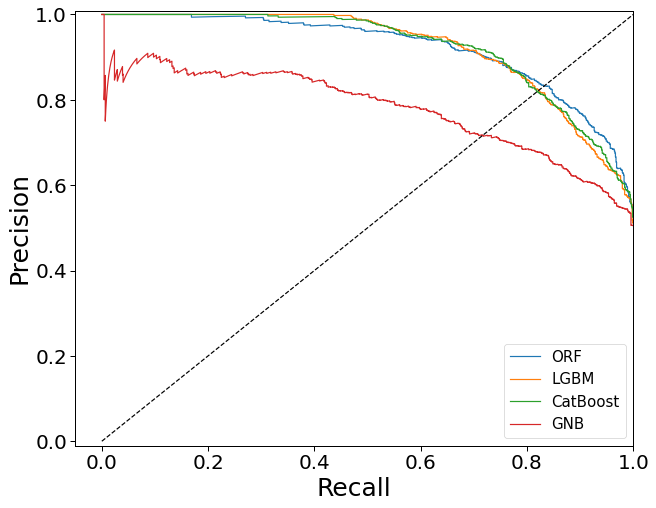

In [83]:
plot_multi_precison_vs_recall_curve(proba_dic,y_test,link+'p_r_c_fresh.png')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


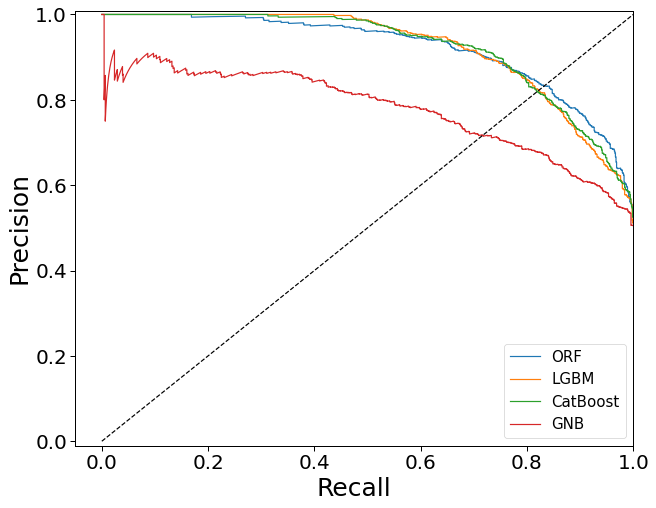

In [84]:
plot_multi_precison_vs_recall_curve(proba_dic,y_test,link+'p_r_c_fresh.eps')

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
res_df1=dict(
    ORF= cross_val_score(rf1,x,y,cv=10),
    LGBM=cross_val_score(lgbm1,x,y,cv=10),
    
    CatBoost=cross_val_score(cat_clf,x,y,cv=10),
    GNB=cross_val_score(gbc_clf,x,y,cv=10)
     )

Learning rate set to 0.023083
0:	learn: 0.6826786	total: 9.24ms	remaining: 9.23s
1:	learn: 0.6728003	total: 18ms	remaining: 8.96s
2:	learn: 0.6645922	total: 26.6ms	remaining: 8.84s
3:	learn: 0.6555791	total: 34.9ms	remaining: 8.69s
4:	learn: 0.6470112	total: 43.4ms	remaining: 8.63s
5:	learn: 0.6406337	total: 52.9ms	remaining: 8.77s
6:	learn: 0.6318888	total: 61.9ms	remaining: 8.78s
7:	learn: 0.6244065	total: 70.6ms	remaining: 8.75s
8:	learn: 0.6182844	total: 79.8ms	remaining: 8.79s
9:	learn: 0.6118276	total: 88.5ms	remaining: 8.76s
10:	learn: 0.6046301	total: 97ms	remaining: 8.72s
11:	learn: 0.5984390	total: 105ms	remaining: 8.67s
12:	learn: 0.5935478	total: 114ms	remaining: 8.67s
13:	learn: 0.5864911	total: 123ms	remaining: 8.64s
14:	learn: 0.5818846	total: 131ms	remaining: 8.62s
15:	learn: 0.5761800	total: 140ms	remaining: 8.6s
16:	learn: 0.5698925	total: 148ms	remaining: 8.57s
17:	learn: 0.5639268	total: 157ms	remaining: 8.57s
18:	learn: 0.5594206	total: 166ms	remaining: 8.56s
19:	l

162:	learn: 0.3715435	total: 1.75s	remaining: 8.97s
163:	learn: 0.3711710	total: 1.76s	remaining: 8.96s
164:	learn: 0.3705390	total: 1.77s	remaining: 8.96s
165:	learn: 0.3703498	total: 1.78s	remaining: 8.95s
166:	learn: 0.3700648	total: 1.79s	remaining: 8.94s
167:	learn: 0.3696867	total: 1.8s	remaining: 8.94s
168:	learn: 0.3692759	total: 1.82s	remaining: 8.93s
169:	learn: 0.3688042	total: 1.83s	remaining: 8.93s
170:	learn: 0.3684881	total: 1.84s	remaining: 8.92s
171:	learn: 0.3681598	total: 1.85s	remaining: 8.91s
172:	learn: 0.3678703	total: 1.86s	remaining: 8.9s
173:	learn: 0.3673652	total: 1.87s	remaining: 8.9s
174:	learn: 0.3670515	total: 1.89s	remaining: 8.89s
175:	learn: 0.3667541	total: 1.9s	remaining: 8.88s
176:	learn: 0.3659776	total: 1.91s	remaining: 8.87s
177:	learn: 0.3656142	total: 1.92s	remaining: 8.87s
178:	learn: 0.3653313	total: 1.93s	remaining: 8.87s
179:	learn: 0.3650667	total: 1.95s	remaining: 8.86s
180:	learn: 0.3648063	total: 1.96s	remaining: 8.85s
181:	learn: 0.36

344:	learn: 0.3245698	total: 3.48s	remaining: 6.61s
345:	learn: 0.3243040	total: 3.49s	remaining: 6.59s
346:	learn: 0.3242185	total: 3.5s	remaining: 6.58s
347:	learn: 0.3240931	total: 3.5s	remaining: 6.56s
348:	learn: 0.3237814	total: 3.51s	remaining: 6.55s
349:	learn: 0.3235212	total: 3.52s	remaining: 6.53s
350:	learn: 0.3232578	total: 3.52s	remaining: 6.52s
351:	learn: 0.3229241	total: 3.53s	remaining: 6.5s
352:	learn: 0.3227521	total: 3.54s	remaining: 6.49s
353:	learn: 0.3225061	total: 3.55s	remaining: 6.47s
354:	learn: 0.3222633	total: 3.55s	remaining: 6.46s
355:	learn: 0.3221421	total: 3.56s	remaining: 6.44s
356:	learn: 0.3218930	total: 3.57s	remaining: 6.43s
357:	learn: 0.3216885	total: 3.58s	remaining: 6.41s
358:	learn: 0.3215307	total: 3.58s	remaining: 6.4s
359:	learn: 0.3211923	total: 3.59s	remaining: 6.38s
360:	learn: 0.3209703	total: 3.6s	remaining: 6.37s
361:	learn: 0.3208147	total: 3.6s	remaining: 6.35s
362:	learn: 0.3204911	total: 3.61s	remaining: 6.34s
363:	learn: 0.3202

516:	learn: 0.2924969	total: 4.76s	remaining: 4.44s
517:	learn: 0.2923539	total: 4.76s	remaining: 4.43s
518:	learn: 0.2921192	total: 4.77s	remaining: 4.42s
519:	learn: 0.2919552	total: 4.78s	remaining: 4.41s
520:	learn: 0.2918374	total: 4.79s	remaining: 4.4s
521:	learn: 0.2917200	total: 4.79s	remaining: 4.39s
522:	learn: 0.2915441	total: 4.8s	remaining: 4.38s
523:	learn: 0.2914345	total: 4.81s	remaining: 4.37s
524:	learn: 0.2912790	total: 4.82s	remaining: 4.36s
525:	learn: 0.2911455	total: 4.82s	remaining: 4.34s
526:	learn: 0.2909312	total: 4.83s	remaining: 4.33s
527:	learn: 0.2906823	total: 4.84s	remaining: 4.32s
528:	learn: 0.2905399	total: 4.84s	remaining: 4.31s
529:	learn: 0.2904301	total: 4.85s	remaining: 4.3s
530:	learn: 0.2902131	total: 4.86s	remaining: 4.29s
531:	learn: 0.2900759	total: 4.87s	remaining: 4.28s
532:	learn: 0.2899606	total: 4.87s	remaining: 4.27s
533:	learn: 0.2898192	total: 4.88s	remaining: 4.26s
534:	learn: 0.2896971	total: 4.89s	remaining: 4.25s
535:	learn: 0.2

692:	learn: 0.2683665	total: 6.04s	remaining: 2.68s
693:	learn: 0.2682056	total: 6.05s	remaining: 2.67s
694:	learn: 0.2680942	total: 6.06s	remaining: 2.66s
695:	learn: 0.2679891	total: 6.06s	remaining: 2.65s
696:	learn: 0.2678473	total: 6.07s	remaining: 2.64s
697:	learn: 0.2676955	total: 6.08s	remaining: 2.63s
698:	learn: 0.2675348	total: 6.08s	remaining: 2.62s
699:	learn: 0.2674002	total: 6.09s	remaining: 2.61s
700:	learn: 0.2672521	total: 6.1s	remaining: 2.6s
701:	learn: 0.2671285	total: 6.11s	remaining: 2.59s
702:	learn: 0.2670170	total: 6.11s	remaining: 2.58s
703:	learn: 0.2668951	total: 6.12s	remaining: 2.57s
704:	learn: 0.2667889	total: 6.13s	remaining: 2.56s
705:	learn: 0.2666936	total: 6.14s	remaining: 2.56s
706:	learn: 0.2665293	total: 6.14s	remaining: 2.55s
707:	learn: 0.2663976	total: 6.15s	remaining: 2.54s
708:	learn: 0.2662710	total: 6.16s	remaining: 2.53s
709:	learn: 0.2661320	total: 6.17s	remaining: 2.52s
710:	learn: 0.2660213	total: 6.17s	remaining: 2.51s
711:	learn: 0.

865:	learn: 0.2479414	total: 7.32s	remaining: 1.13s
866:	learn: 0.2478449	total: 7.33s	remaining: 1.12s
867:	learn: 0.2477103	total: 7.33s	remaining: 1.11s
868:	learn: 0.2476538	total: 7.34s	remaining: 1.11s
869:	learn: 0.2475001	total: 7.35s	remaining: 1.1s
870:	learn: 0.2474472	total: 7.35s	remaining: 1.09s
871:	learn: 0.2473640	total: 7.36s	remaining: 1.08s
872:	learn: 0.2472056	total: 7.37s	remaining: 1.07s
873:	learn: 0.2470758	total: 7.38s	remaining: 1.06s
874:	learn: 0.2469649	total: 7.38s	remaining: 1.05s
875:	learn: 0.2468071	total: 7.39s	remaining: 1.05s
876:	learn: 0.2466702	total: 7.4s	remaining: 1.04s
877:	learn: 0.2465292	total: 7.41s	remaining: 1.03s
878:	learn: 0.2463727	total: 7.41s	remaining: 1.02s
879:	learn: 0.2462638	total: 7.42s	remaining: 1.01s
880:	learn: 0.2461580	total: 7.43s	remaining: 1s
881:	learn: 0.2460887	total: 7.43s	remaining: 995ms
882:	learn: 0.2459927	total: 7.44s	remaining: 986ms
883:	learn: 0.2458856	total: 7.45s	remaining: 978ms
884:	learn: 0.245

23:	learn: 0.5444643	total: 185ms	remaining: 7.53s
24:	learn: 0.5415368	total: 194ms	remaining: 7.58s
25:	learn: 0.5384842	total: 201ms	remaining: 7.54s
26:	learn: 0.5339127	total: 209ms	remaining: 7.52s
27:	learn: 0.5310156	total: 216ms	remaining: 7.49s
28:	learn: 0.5278582	total: 223ms	remaining: 7.47s
29:	learn: 0.5233964	total: 231ms	remaining: 7.46s
30:	learn: 0.5204858	total: 238ms	remaining: 7.44s
31:	learn: 0.5178049	total: 245ms	remaining: 7.42s
32:	learn: 0.5149962	total: 253ms	remaining: 7.42s
33:	learn: 0.5127070	total: 260ms	remaining: 7.39s
34:	learn: 0.5100540	total: 268ms	remaining: 7.38s
35:	learn: 0.5083442	total: 275ms	remaining: 7.37s
36:	learn: 0.5056330	total: 283ms	remaining: 7.37s
37:	learn: 0.5038999	total: 291ms	remaining: 7.37s
38:	learn: 0.5014418	total: 299ms	remaining: 7.38s
39:	learn: 0.4994755	total: 307ms	remaining: 7.37s
40:	learn: 0.4957340	total: 315ms	remaining: 7.36s
41:	learn: 0.4932023	total: 322ms	remaining: 7.35s
42:	learn: 0.4906108	total: 330

193:	learn: 0.3712871	total: 1.48s	remaining: 6.16s
194:	learn: 0.3707965	total: 1.49s	remaining: 6.15s
195:	learn: 0.3704517	total: 1.5s	remaining: 6.14s
196:	learn: 0.3702253	total: 1.5s	remaining: 6.13s
197:	learn: 0.3698658	total: 1.51s	remaining: 6.13s
198:	learn: 0.3695965	total: 1.52s	remaining: 6.12s
199:	learn: 0.3692000	total: 1.53s	remaining: 6.11s
200:	learn: 0.3688957	total: 1.53s	remaining: 6.1s
201:	learn: 0.3685902	total: 1.54s	remaining: 6.09s
202:	learn: 0.3682418	total: 1.55s	remaining: 6.08s
203:	learn: 0.3678020	total: 1.56s	remaining: 6.07s
204:	learn: 0.3674984	total: 1.56s	remaining: 6.07s
205:	learn: 0.3673012	total: 1.57s	remaining: 6.06s
206:	learn: 0.3669928	total: 1.58s	remaining: 6.05s
207:	learn: 0.3666845	total: 1.59s	remaining: 6.04s
208:	learn: 0.3663661	total: 1.59s	remaining: 6.03s
209:	learn: 0.3661421	total: 1.6s	remaining: 6.02s
210:	learn: 0.3658405	total: 1.61s	remaining: 6.01s
211:	learn: 0.3656130	total: 1.61s	remaining: 6s
212:	learn: 0.36524

364:	learn: 0.3308678	total: 2.77s	remaining: 4.83s
365:	learn: 0.3307008	total: 2.78s	remaining: 4.82s
366:	learn: 0.3305126	total: 2.79s	remaining: 4.81s
367:	learn: 0.3303592	total: 2.8s	remaining: 4.8s
368:	learn: 0.3299912	total: 2.8s	remaining: 4.8s
369:	learn: 0.3297166	total: 2.81s	remaining: 4.79s
370:	learn: 0.3294594	total: 2.82s	remaining: 4.78s
371:	learn: 0.3291620	total: 2.83s	remaining: 4.77s
372:	learn: 0.3289386	total: 2.83s	remaining: 4.76s
373:	learn: 0.3287411	total: 2.84s	remaining: 4.76s
374:	learn: 0.3285480	total: 2.85s	remaining: 4.75s
375:	learn: 0.3283059	total: 2.85s	remaining: 4.74s
376:	learn: 0.3281073	total: 2.86s	remaining: 4.73s
377:	learn: 0.3279699	total: 2.87s	remaining: 4.72s
378:	learn: 0.3276658	total: 2.88s	remaining: 4.71s
379:	learn: 0.3274678	total: 2.88s	remaining: 4.71s
380:	learn: 0.3272179	total: 2.89s	remaining: 4.7s
381:	learn: 0.3270754	total: 2.9s	remaining: 4.69s
382:	learn: 0.3268702	total: 2.91s	remaining: 4.68s
383:	learn: 0.3266

533:	learn: 0.3000181	total: 4.07s	remaining: 3.56s
534:	learn: 0.2997572	total: 4.08s	remaining: 3.55s
535:	learn: 0.2994443	total: 4.09s	remaining: 3.54s
536:	learn: 0.2992687	total: 4.1s	remaining: 3.53s
537:	learn: 0.2991177	total: 4.1s	remaining: 3.52s
538:	learn: 0.2989940	total: 4.11s	remaining: 3.52s
539:	learn: 0.2987557	total: 4.12s	remaining: 3.51s
540:	learn: 0.2985727	total: 4.13s	remaining: 3.5s
541:	learn: 0.2983901	total: 4.13s	remaining: 3.49s
542:	learn: 0.2982733	total: 4.14s	remaining: 3.48s
543:	learn: 0.2980527	total: 4.15s	remaining: 3.48s
544:	learn: 0.2979484	total: 4.15s	remaining: 3.47s
545:	learn: 0.2977896	total: 4.16s	remaining: 3.46s
546:	learn: 0.2976474	total: 4.17s	remaining: 3.45s
547:	learn: 0.2974758	total: 4.18s	remaining: 3.44s
548:	learn: 0.2972222	total: 4.18s	remaining: 3.44s
549:	learn: 0.2970276	total: 4.19s	remaining: 3.43s
550:	learn: 0.2968444	total: 4.2s	remaining: 3.42s
551:	learn: 0.2966671	total: 4.21s	remaining: 3.41s
552:	learn: 0.29

706:	learn: 0.2744064	total: 5.35s	remaining: 2.22s
707:	learn: 0.2743136	total: 5.36s	remaining: 2.21s
708:	learn: 0.2741797	total: 5.37s	remaining: 2.2s
709:	learn: 0.2740114	total: 5.37s	remaining: 2.19s
710:	learn: 0.2739000	total: 5.38s	remaining: 2.19s
711:	learn: 0.2738098	total: 5.39s	remaining: 2.18s
712:	learn: 0.2736578	total: 5.39s	remaining: 2.17s
713:	learn: 0.2735396	total: 5.4s	remaining: 2.16s
714:	learn: 0.2733920	total: 5.41s	remaining: 2.15s
715:	learn: 0.2732237	total: 5.42s	remaining: 2.15s
716:	learn: 0.2730830	total: 5.42s	remaining: 2.14s
717:	learn: 0.2730025	total: 5.43s	remaining: 2.13s
718:	learn: 0.2728865	total: 5.44s	remaining: 2.13s
719:	learn: 0.2727953	total: 5.45s	remaining: 2.12s
720:	learn: 0.2726767	total: 5.45s	remaining: 2.11s
721:	learn: 0.2725654	total: 5.46s	remaining: 2.1s
722:	learn: 0.2723980	total: 5.47s	remaining: 2.1s
723:	learn: 0.2723001	total: 5.48s	remaining: 2.09s
724:	learn: 0.2722288	total: 5.49s	remaining: 2.08s
725:	learn: 0.27

884:	learn: 0.2526560	total: 6.67s	remaining: 866ms
885:	learn: 0.2525581	total: 6.67s	remaining: 859ms
886:	learn: 0.2524159	total: 6.68s	remaining: 851ms
887:	learn: 0.2522786	total: 6.69s	remaining: 844ms
888:	learn: 0.2521672	total: 6.7s	remaining: 836ms
889:	learn: 0.2520805	total: 6.7s	remaining: 828ms
890:	learn: 0.2520178	total: 6.71s	remaining: 821ms
891:	learn: 0.2518939	total: 6.72s	remaining: 813ms
892:	learn: 0.2518019	total: 6.72s	remaining: 806ms
893:	learn: 0.2516855	total: 6.73s	remaining: 798ms
894:	learn: 0.2515685	total: 6.74s	remaining: 791ms
895:	learn: 0.2514891	total: 6.75s	remaining: 783ms
896:	learn: 0.2513378	total: 6.75s	remaining: 775ms
897:	learn: 0.2511792	total: 6.76s	remaining: 768ms
898:	learn: 0.2510937	total: 6.77s	remaining: 760ms
899:	learn: 0.2509536	total: 6.78s	remaining: 754ms
900:	learn: 0.2508347	total: 6.79s	remaining: 746ms
901:	learn: 0.2507006	total: 6.8s	remaining: 739ms
902:	learn: 0.2505141	total: 6.81s	remaining: 731ms
903:	learn: 0.2

50:	learn: 0.4723997	total: 377ms	remaining: 7.01s
51:	learn: 0.4701028	total: 384ms	remaining: 7s
52:	learn: 0.4677857	total: 391ms	remaining: 6.99s
53:	learn: 0.4664901	total: 398ms	remaining: 6.98s
54:	learn: 0.4644953	total: 406ms	remaining: 6.97s
55:	learn: 0.4623984	total: 413ms	remaining: 6.96s
56:	learn: 0.4611939	total: 421ms	remaining: 6.96s
57:	learn: 0.4598380	total: 428ms	remaining: 6.95s
58:	learn: 0.4584726	total: 435ms	remaining: 6.94s
59:	learn: 0.4561235	total: 443ms	remaining: 6.93s
60:	learn: 0.4538016	total: 450ms	remaining: 6.92s
61:	learn: 0.4529360	total: 457ms	remaining: 6.91s
62:	learn: 0.4515922	total: 464ms	remaining: 6.9s
63:	learn: 0.4505356	total: 471ms	remaining: 6.89s
64:	learn: 0.4495835	total: 478ms	remaining: 6.88s
65:	learn: 0.4481175	total: 486ms	remaining: 6.87s
66:	learn: 0.4459179	total: 493ms	remaining: 6.86s
67:	learn: 0.4446485	total: 500ms	remaining: 6.85s
68:	learn: 0.4427463	total: 507ms	remaining: 6.84s
69:	learn: 0.4413607	total: 514ms	r

224:	learn: 0.3632402	total: 1.66s	remaining: 5.7s
225:	learn: 0.3630692	total: 1.66s	remaining: 5.7s
226:	learn: 0.3627929	total: 1.67s	remaining: 5.69s
227:	learn: 0.3624598	total: 1.68s	remaining: 5.68s
228:	learn: 0.3622606	total: 1.69s	remaining: 5.67s
229:	learn: 0.3620404	total: 1.69s	remaining: 5.67s
230:	learn: 0.3618324	total: 1.7s	remaining: 5.66s
231:	learn: 0.3614804	total: 1.71s	remaining: 5.65s
232:	learn: 0.3612791	total: 1.71s	remaining: 5.64s
233:	learn: 0.3610086	total: 1.72s	remaining: 5.63s
234:	learn: 0.3608131	total: 1.73s	remaining: 5.63s
235:	learn: 0.3605425	total: 1.74s	remaining: 5.62s
236:	learn: 0.3602609	total: 1.74s	remaining: 5.61s
237:	learn: 0.3600876	total: 1.75s	remaining: 5.6s
238:	learn: 0.3598839	total: 1.76s	remaining: 5.59s
239:	learn: 0.3596406	total: 1.76s	remaining: 5.59s
240:	learn: 0.3594415	total: 1.77s	remaining: 5.58s
241:	learn: 0.3592682	total: 1.78s	remaining: 5.57s
242:	learn: 0.3590542	total: 1.79s	remaining: 5.56s
243:	learn: 0.35

400:	learn: 0.3238122	total: 2.94s	remaining: 4.39s
401:	learn: 0.3235548	total: 2.95s	remaining: 4.38s
402:	learn: 0.3233589	total: 2.95s	remaining: 4.38s
403:	learn: 0.3231631	total: 2.96s	remaining: 4.37s
404:	learn: 0.3228831	total: 2.97s	remaining: 4.36s
405:	learn: 0.3227235	total: 2.98s	remaining: 4.35s
406:	learn: 0.3225047	total: 2.98s	remaining: 4.35s
407:	learn: 0.3223287	total: 2.99s	remaining: 4.34s
408:	learn: 0.3221920	total: 3s	remaining: 4.33s
409:	learn: 0.3219795	total: 3s	remaining: 4.32s
410:	learn: 0.3217642	total: 3.01s	remaining: 4.32s
411:	learn: 0.3215507	total: 3.02s	remaining: 4.31s
412:	learn: 0.3213887	total: 3.03s	remaining: 4.3s
413:	learn: 0.3211067	total: 3.03s	remaining: 4.29s
414:	learn: 0.3209097	total: 3.04s	remaining: 4.29s
415:	learn: 0.3207129	total: 3.05s	remaining: 4.28s
416:	learn: 0.3205896	total: 3.06s	remaining: 4.27s
417:	learn: 0.3204390	total: 3.06s	remaining: 4.26s
418:	learn: 0.3202861	total: 3.07s	remaining: 4.26s
419:	learn: 0.32010

573:	learn: 0.2934606	total: 4.21s	remaining: 3.13s
574:	learn: 0.2932715	total: 4.22s	remaining: 3.12s
575:	learn: 0.2931377	total: 4.23s	remaining: 3.11s
576:	learn: 0.2929838	total: 4.24s	remaining: 3.11s
577:	learn: 0.2928743	total: 4.24s	remaining: 3.1s
578:	learn: 0.2926811	total: 4.25s	remaining: 3.09s
579:	learn: 0.2924893	total: 4.26s	remaining: 3.08s
580:	learn: 0.2923853	total: 4.27s	remaining: 3.08s
581:	learn: 0.2922123	total: 4.27s	remaining: 3.07s
582:	learn: 0.2920937	total: 4.28s	remaining: 3.06s
583:	learn: 0.2918309	total: 4.29s	remaining: 3.05s
584:	learn: 0.2917151	total: 4.29s	remaining: 3.05s
585:	learn: 0.2915321	total: 4.3s	remaining: 3.04s
586:	learn: 0.2914074	total: 4.31s	remaining: 3.03s
587:	learn: 0.2912506	total: 4.32s	remaining: 3.02s
588:	learn: 0.2911277	total: 4.32s	remaining: 3.02s
589:	learn: 0.2910264	total: 4.33s	remaining: 3.01s
590:	learn: 0.2908348	total: 4.34s	remaining: 3s
591:	learn: 0.2905720	total: 4.34s	remaining: 3s
592:	learn: 0.290388

746:	learn: 0.2693268	total: 5.48s	remaining: 1.86s
747:	learn: 0.2692129	total: 5.49s	remaining: 1.85s
748:	learn: 0.2691050	total: 5.5s	remaining: 1.84s
749:	learn: 0.2689262	total: 5.51s	remaining: 1.83s
750:	learn: 0.2687807	total: 5.51s	remaining: 1.83s
751:	learn: 0.2685882	total: 5.52s	remaining: 1.82s
752:	learn: 0.2684867	total: 5.53s	remaining: 1.81s
753:	learn: 0.2683820	total: 5.54s	remaining: 1.8s
754:	learn: 0.2682419	total: 5.54s	remaining: 1.8s
755:	learn: 0.2681283	total: 5.55s	remaining: 1.79s
756:	learn: 0.2680102	total: 5.56s	remaining: 1.78s
757:	learn: 0.2678758	total: 5.56s	remaining: 1.78s
758:	learn: 0.2677575	total: 5.57s	remaining: 1.77s
759:	learn: 0.2676389	total: 5.58s	remaining: 1.76s
760:	learn: 0.2675260	total: 5.58s	remaining: 1.75s
761:	learn: 0.2673733	total: 5.59s	remaining: 1.75s
762:	learn: 0.2672712	total: 5.6s	remaining: 1.74s
763:	learn: 0.2671002	total: 5.61s	remaining: 1.73s
764:	learn: 0.2669657	total: 5.61s	remaining: 1.72s
765:	learn: 0.26

920:	learn: 0.2490916	total: 6.76s	remaining: 580ms
921:	learn: 0.2489678	total: 6.77s	remaining: 573ms
922:	learn: 0.2488912	total: 6.78s	remaining: 566ms
923:	learn: 0.2487905	total: 6.79s	remaining: 558ms
924:	learn: 0.2487072	total: 6.79s	remaining: 551ms
925:	learn: 0.2485699	total: 6.8s	remaining: 544ms
926:	learn: 0.2485005	total: 6.81s	remaining: 536ms
927:	learn: 0.2484258	total: 6.82s	remaining: 529ms
928:	learn: 0.2482775	total: 6.82s	remaining: 521ms
929:	learn: 0.2481717	total: 6.83s	remaining: 514ms
930:	learn: 0.2481117	total: 6.84s	remaining: 507ms
931:	learn: 0.2480210	total: 6.84s	remaining: 499ms
932:	learn: 0.2479251	total: 6.85s	remaining: 492ms
933:	learn: 0.2478359	total: 6.86s	remaining: 485ms
934:	learn: 0.2477115	total: 6.87s	remaining: 477ms
935:	learn: 0.2476288	total: 6.87s	remaining: 470ms
936:	learn: 0.2475217	total: 6.88s	remaining: 463ms
937:	learn: 0.2473513	total: 6.89s	remaining: 455ms
938:	learn: 0.2471845	total: 6.89s	remaining: 448ms
939:	learn: 0

100:	learn: 0.4163284	total: 751ms	remaining: 6.68s
101:	learn: 0.4158094	total: 758ms	remaining: 6.67s
102:	learn: 0.4148809	total: 765ms	remaining: 6.67s
103:	learn: 0.4143139	total: 773ms	remaining: 6.66s
104:	learn: 0.4138757	total: 780ms	remaining: 6.65s
105:	learn: 0.4125495	total: 787ms	remaining: 6.64s
106:	learn: 0.4121974	total: 795ms	remaining: 6.63s
107:	learn: 0.4114690	total: 802ms	remaining: 6.62s
108:	learn: 0.4108146	total: 809ms	remaining: 6.61s
109:	learn: 0.4102072	total: 816ms	remaining: 6.6s
110:	learn: 0.4093596	total: 823ms	remaining: 6.59s
111:	learn: 0.4086536	total: 831ms	remaining: 6.58s
112:	learn: 0.4076896	total: 838ms	remaining: 6.58s
113:	learn: 0.4071976	total: 845ms	remaining: 6.57s
114:	learn: 0.4063646	total: 853ms	remaining: 6.56s
115:	learn: 0.4053378	total: 860ms	remaining: 6.55s
116:	learn: 0.4045754	total: 867ms	remaining: 6.54s
117:	learn: 0.4041039	total: 874ms	remaining: 6.54s
118:	learn: 0.4036827	total: 882ms	remaining: 6.53s
119:	learn: 0

276:	learn: 0.3513622	total: 2.05s	remaining: 5.35s
277:	learn: 0.3511037	total: 2.06s	remaining: 5.34s
278:	learn: 0.3508590	total: 2.06s	remaining: 5.33s
279:	learn: 0.3506672	total: 2.07s	remaining: 5.33s
280:	learn: 0.3503136	total: 2.08s	remaining: 5.32s
281:	learn: 0.3501829	total: 2.09s	remaining: 5.31s
282:	learn: 0.3499823	total: 2.09s	remaining: 5.3s
283:	learn: 0.3498070	total: 2.1s	remaining: 5.3s
284:	learn: 0.3496278	total: 2.11s	remaining: 5.29s
285:	learn: 0.3493369	total: 2.12s	remaining: 5.28s
286:	learn: 0.3491115	total: 2.12s	remaining: 5.27s
287:	learn: 0.3489922	total: 2.13s	remaining: 5.26s
288:	learn: 0.3487914	total: 2.14s	remaining: 5.26s
289:	learn: 0.3486106	total: 2.14s	remaining: 5.25s
290:	learn: 0.3482886	total: 2.15s	remaining: 5.24s
291:	learn: 0.3478649	total: 2.16s	remaining: 5.24s
292:	learn: 0.3475920	total: 2.17s	remaining: 5.23s
293:	learn: 0.3473948	total: 2.17s	remaining: 5.22s
294:	learn: 0.3472057	total: 2.18s	remaining: 5.21s
295:	learn: 0.3

453:	learn: 0.3138385	total: 3.36s	remaining: 4.04s
454:	learn: 0.3137266	total: 3.37s	remaining: 4.03s
455:	learn: 0.3135537	total: 3.37s	remaining: 4.03s
456:	learn: 0.3133019	total: 3.38s	remaining: 4.02s
457:	learn: 0.3131018	total: 3.39s	remaining: 4.01s
458:	learn: 0.3129365	total: 3.4s	remaining: 4s
459:	learn: 0.3127231	total: 3.4s	remaining: 4s
460:	learn: 0.3125840	total: 3.41s	remaining: 3.99s
461:	learn: 0.3124650	total: 3.42s	remaining: 3.98s
462:	learn: 0.3122632	total: 3.42s	remaining: 3.97s
463:	learn: 0.3120535	total: 3.43s	remaining: 3.96s
464:	learn: 0.3118490	total: 3.44s	remaining: 3.96s
465:	learn: 0.3116486	total: 3.45s	remaining: 3.95s
466:	learn: 0.3115578	total: 3.45s	remaining: 3.94s
467:	learn: 0.3113977	total: 3.46s	remaining: 3.93s
468:	learn: 0.3111998	total: 3.47s	remaining: 3.93s
469:	learn: 0.3110171	total: 3.48s	remaining: 3.92s
470:	learn: 0.3107949	total: 3.48s	remaining: 3.91s
471:	learn: 0.3106155	total: 3.49s	remaining: 3.9s
472:	learn: 0.3104483

630:	learn: 0.2861381	total: 4.64s	remaining: 2.72s
631:	learn: 0.2859402	total: 4.65s	remaining: 2.71s
632:	learn: 0.2857824	total: 4.66s	remaining: 2.7s
633:	learn: 0.2856359	total: 4.67s	remaining: 2.69s
634:	learn: 0.2855317	total: 4.67s	remaining: 2.69s
635:	learn: 0.2853794	total: 4.68s	remaining: 2.68s
636:	learn: 0.2852598	total: 4.69s	remaining: 2.67s
637:	learn: 0.2851506	total: 4.69s	remaining: 2.66s
638:	learn: 0.2850102	total: 4.7s	remaining: 2.66s
639:	learn: 0.2848065	total: 4.71s	remaining: 2.65s
640:	learn: 0.2847054	total: 4.72s	remaining: 2.64s
641:	learn: 0.2845203	total: 4.72s	remaining: 2.63s
642:	learn: 0.2843316	total: 4.73s	remaining: 2.63s
643:	learn: 0.2842739	total: 4.74s	remaining: 2.62s
644:	learn: 0.2841605	total: 4.75s	remaining: 2.61s
645:	learn: 0.2839869	total: 4.75s	remaining: 2.6s
646:	learn: 0.2838305	total: 4.76s	remaining: 2.6s
647:	learn: 0.2836179	total: 4.77s	remaining: 2.59s
648:	learn: 0.2834324	total: 4.77s	remaining: 2.58s
649:	learn: 0.28

807:	learn: 0.2617729	total: 5.94s	remaining: 1.41s
808:	learn: 0.2615932	total: 5.94s	remaining: 1.4s
809:	learn: 0.2614564	total: 5.95s	remaining: 1.4s
810:	learn: 0.2613687	total: 5.96s	remaining: 1.39s
811:	learn: 0.2612259	total: 5.96s	remaining: 1.38s
812:	learn: 0.2611869	total: 5.97s	remaining: 1.37s
813:	learn: 0.2611414	total: 5.98s	remaining: 1.37s
814:	learn: 0.2610251	total: 5.99s	remaining: 1.36s
815:	learn: 0.2608710	total: 5.99s	remaining: 1.35s
816:	learn: 0.2607479	total: 6s	remaining: 1.34s
817:	learn: 0.2606412	total: 6.01s	remaining: 1.34s
818:	learn: 0.2605691	total: 6.02s	remaining: 1.33s
819:	learn: 0.2604441	total: 6.02s	remaining: 1.32s
820:	learn: 0.2603028	total: 6.03s	remaining: 1.31s
821:	learn: 0.2602518	total: 6.04s	remaining: 1.31s
822:	learn: 0.2601328	total: 6.04s	remaining: 1.3s
823:	learn: 0.2600622	total: 6.05s	remaining: 1.29s
824:	learn: 0.2598663	total: 6.06s	remaining: 1.28s
825:	learn: 0.2596504	total: 6.07s	remaining: 1.28s
826:	learn: 0.2595

982:	learn: 0.2412219	total: 7.21s	remaining: 125ms
983:	learn: 0.2411460	total: 7.22s	remaining: 117ms
984:	learn: 0.2410442	total: 7.23s	remaining: 110ms
985:	learn: 0.2409426	total: 7.24s	remaining: 103ms
986:	learn: 0.2407998	total: 7.24s	remaining: 95.4ms
987:	learn: 0.2406703	total: 7.25s	remaining: 88.1ms
988:	learn: 0.2405767	total: 7.26s	remaining: 80.7ms
989:	learn: 0.2404511	total: 7.26s	remaining: 73.4ms
990:	learn: 0.2403233	total: 7.27s	remaining: 66.1ms
991:	learn: 0.2402483	total: 7.28s	remaining: 58.7ms
992:	learn: 0.2401192	total: 7.29s	remaining: 51.4ms
993:	learn: 0.2400071	total: 7.29s	remaining: 44ms
994:	learn: 0.2398531	total: 7.3s	remaining: 36.7ms
995:	learn: 0.2397587	total: 7.31s	remaining: 29.4ms
996:	learn: 0.2396623	total: 7.32s	remaining: 22ms
997:	learn: 0.2395344	total: 7.33s	remaining: 14.7ms
998:	learn: 0.2394707	total: 7.33s	remaining: 7.34ms
999:	learn: 0.2393623	total: 7.34s	remaining: 0us
Learning rate set to 0.023083
0:	learn: 0.6857820	total: 7

149:	learn: 0.4031047	total: 1.1s	remaining: 6.24s
150:	learn: 0.4027185	total: 1.11s	remaining: 6.24s
151:	learn: 0.4022284	total: 1.12s	remaining: 6.23s
152:	learn: 0.4019553	total: 1.12s	remaining: 6.22s
153:	learn: 0.4016189	total: 1.13s	remaining: 6.21s
154:	learn: 0.4010155	total: 1.14s	remaining: 6.2s
155:	learn: 0.4005151	total: 1.15s	remaining: 6.2s
156:	learn: 0.3999159	total: 1.15s	remaining: 6.19s
157:	learn: 0.3992994	total: 1.16s	remaining: 6.18s
158:	learn: 0.3990724	total: 1.17s	remaining: 6.18s
159:	learn: 0.3987488	total: 1.17s	remaining: 6.17s
160:	learn: 0.3984023	total: 1.18s	remaining: 6.16s
161:	learn: 0.3979387	total: 1.19s	remaining: 6.16s
162:	learn: 0.3976293	total: 1.2s	remaining: 6.16s
163:	learn: 0.3972416	total: 1.21s	remaining: 6.16s
164:	learn: 0.3970097	total: 1.22s	remaining: 6.17s
165:	learn: 0.3966517	total: 1.23s	remaining: 6.16s
166:	learn: 0.3963759	total: 1.23s	remaining: 6.15s
167:	learn: 0.3960408	total: 1.24s	remaining: 6.15s
168:	learn: 0.39

321:	learn: 0.3550927	total: 2.38s	remaining: 5.01s
322:	learn: 0.3549349	total: 2.39s	remaining: 5s
323:	learn: 0.3546584	total: 2.39s	remaining: 4.99s
324:	learn: 0.3545122	total: 2.4s	remaining: 4.99s
325:	learn: 0.3542599	total: 2.41s	remaining: 4.98s
326:	learn: 0.3540543	total: 2.42s	remaining: 4.97s
327:	learn: 0.3537606	total: 2.42s	remaining: 4.97s
328:	learn: 0.3536399	total: 2.43s	remaining: 4.96s
329:	learn: 0.3534957	total: 2.44s	remaining: 4.95s
330:	learn: 0.3533408	total: 2.44s	remaining: 4.94s
331:	learn: 0.3530535	total: 2.45s	remaining: 4.93s
332:	learn: 0.3528273	total: 2.46s	remaining: 4.93s
333:	learn: 0.3526116	total: 2.47s	remaining: 4.92s
334:	learn: 0.3524651	total: 2.48s	remaining: 4.91s
335:	learn: 0.3522381	total: 2.48s	remaining: 4.91s
336:	learn: 0.3520303	total: 2.49s	remaining: 4.9s
337:	learn: 0.3517770	total: 2.5s	remaining: 4.89s
338:	learn: 0.3515888	total: 2.5s	remaining: 4.88s
339:	learn: 0.3514141	total: 2.51s	remaining: 4.87s
340:	learn: 0.35120

495:	learn: 0.3216687	total: 3.67s	remaining: 3.73s
496:	learn: 0.3215158	total: 3.68s	remaining: 3.73s
497:	learn: 0.3213575	total: 3.69s	remaining: 3.72s
498:	learn: 0.3212495	total: 3.7s	remaining: 3.71s
499:	learn: 0.3211000	total: 3.7s	remaining: 3.7s
500:	learn: 0.3209772	total: 3.71s	remaining: 3.7s
501:	learn: 0.3208333	total: 3.72s	remaining: 3.69s
502:	learn: 0.3206859	total: 3.73s	remaining: 3.68s
503:	learn: 0.3206027	total: 3.73s	remaining: 3.67s
504:	learn: 0.3204371	total: 3.74s	remaining: 3.67s
505:	learn: 0.3202722	total: 3.75s	remaining: 3.66s
506:	learn: 0.3201232	total: 3.75s	remaining: 3.65s
507:	learn: 0.3198821	total: 3.76s	remaining: 3.64s
508:	learn: 0.3197515	total: 3.77s	remaining: 3.63s
509:	learn: 0.3196036	total: 3.77s	remaining: 3.63s
510:	learn: 0.3194610	total: 3.78s	remaining: 3.62s
511:	learn: 0.3192737	total: 3.79s	remaining: 3.61s
512:	learn: 0.3191818	total: 3.8s	remaining: 3.6s
513:	learn: 0.3189899	total: 3.8s	remaining: 3.6s
514:	learn: 0.318841

665:	learn: 0.2955921	total: 4.95s	remaining: 2.48s
666:	learn: 0.2954162	total: 4.96s	remaining: 2.48s
667:	learn: 0.2953143	total: 4.97s	remaining: 2.47s
668:	learn: 0.2951251	total: 4.98s	remaining: 2.46s
669:	learn: 0.2949881	total: 4.98s	remaining: 2.46s
670:	learn: 0.2948268	total: 4.99s	remaining: 2.45s
671:	learn: 0.2946484	total: 5s	remaining: 2.44s
672:	learn: 0.2945219	total: 5.01s	remaining: 2.43s
673:	learn: 0.2944037	total: 5.01s	remaining: 2.42s
674:	learn: 0.2942613	total: 5.02s	remaining: 2.42s
675:	learn: 0.2941335	total: 5.03s	remaining: 2.41s
676:	learn: 0.2939701	total: 5.04s	remaining: 2.4s
677:	learn: 0.2938743	total: 5.05s	remaining: 2.4s
678:	learn: 0.2937924	total: 5.05s	remaining: 2.39s
679:	learn: 0.2937395	total: 5.06s	remaining: 2.38s
680:	learn: 0.2936499	total: 5.07s	remaining: 2.37s
681:	learn: 0.2935519	total: 5.08s	remaining: 2.37s
682:	learn: 0.2933864	total: 5.08s	remaining: 2.36s
683:	learn: 0.2932592	total: 5.09s	remaining: 2.35s
684:	learn: 0.293

836:	learn: 0.2745894	total: 6.24s	remaining: 1.22s
837:	learn: 0.2744542	total: 6.25s	remaining: 1.21s
838:	learn: 0.2743622	total: 6.26s	remaining: 1.2s
839:	learn: 0.2742654	total: 6.26s	remaining: 1.19s
840:	learn: 0.2741250	total: 6.27s	remaining: 1.19s
841:	learn: 0.2740480	total: 6.28s	remaining: 1.18s
842:	learn: 0.2739556	total: 6.29s	remaining: 1.17s
843:	learn: 0.2739035	total: 6.3s	remaining: 1.16s
844:	learn: 0.2738106	total: 6.31s	remaining: 1.16s
845:	learn: 0.2736143	total: 6.32s	remaining: 1.15s
846:	learn: 0.2734749	total: 6.33s	remaining: 1.14s
847:	learn: 0.2733226	total: 6.33s	remaining: 1.14s
848:	learn: 0.2731877	total: 6.34s	remaining: 1.13s
849:	learn: 0.2731025	total: 6.35s	remaining: 1.12s
850:	learn: 0.2729722	total: 6.36s	remaining: 1.11s
851:	learn: 0.2729014	total: 6.37s	remaining: 1.1s
852:	learn: 0.2727434	total: 6.37s	remaining: 1.1s
853:	learn: 0.2725428	total: 6.38s	remaining: 1.09s
854:	learn: 0.2723592	total: 6.39s	remaining: 1.08s
855:	learn: 0.27

Learning rate set to 0.023083
0:	learn: 0.6857718	total: 7.91ms	remaining: 7.9s
1:	learn: 0.6773395	total: 15.1ms	remaining: 7.54s
2:	learn: 0.6696400	total: 22.2ms	remaining: 7.39s
3:	learn: 0.6612237	total: 29.4ms	remaining: 7.31s
4:	learn: 0.6533078	total: 36.4ms	remaining: 7.24s
5:	learn: 0.6473999	total: 43.8ms	remaining: 7.26s
6:	learn: 0.6399553	total: 50.9ms	remaining: 7.21s
7:	learn: 0.6348397	total: 58ms	remaining: 7.19s
8:	learn: 0.6285202	total: 65.1ms	remaining: 7.17s
9:	learn: 0.6223759	total: 72.2ms	remaining: 7.15s
10:	learn: 0.6162902	total: 79.4ms	remaining: 7.14s
11:	learn: 0.6117543	total: 86.4ms	remaining: 7.12s
12:	learn: 0.6071718	total: 93.6ms	remaining: 7.11s
13:	learn: 0.6015278	total: 101ms	remaining: 7.09s
14:	learn: 0.5974045	total: 108ms	remaining: 7.08s
15:	learn: 0.5932378	total: 115ms	remaining: 7.06s
16:	learn: 0.5885791	total: 122ms	remaining: 7.05s
17:	learn: 0.5844153	total: 129ms	remaining: 7.06s
18:	learn: 0.5810077	total: 136ms	remaining: 7.04s
1

175:	learn: 0.4093980	total: 1.3s	remaining: 6.1s
176:	learn: 0.4087994	total: 1.31s	remaining: 6.11s
177:	learn: 0.4085017	total: 1.32s	remaining: 6.12s
178:	learn: 0.4082257	total: 1.33s	remaining: 6.12s
179:	learn: 0.4078308	total: 1.34s	remaining: 6.12s
180:	learn: 0.4074988	total: 1.35s	remaining: 6.11s
181:	learn: 0.4072459	total: 1.36s	remaining: 6.11s
182:	learn: 0.4068781	total: 1.37s	remaining: 6.1s
183:	learn: 0.4064834	total: 1.37s	remaining: 6.09s
184:	learn: 0.4061592	total: 1.38s	remaining: 6.08s
185:	learn: 0.4058309	total: 1.39s	remaining: 6.08s
186:	learn: 0.4056203	total: 1.4s	remaining: 6.07s
187:	learn: 0.4051489	total: 1.4s	remaining: 6.06s
188:	learn: 0.4047660	total: 1.41s	remaining: 6.05s
189:	learn: 0.4045106	total: 1.42s	remaining: 6.04s
190:	learn: 0.4041286	total: 1.42s	remaining: 6.03s
191:	learn: 0.4039474	total: 1.43s	remaining: 6.03s
192:	learn: 0.4036735	total: 1.44s	remaining: 6.02s
193:	learn: 0.4033974	total: 1.45s	remaining: 6.01s
194:	learn: 0.403

347:	learn: 0.3663903	total: 2.58s	remaining: 4.84s
348:	learn: 0.3661312	total: 2.59s	remaining: 4.83s
349:	learn: 0.3658990	total: 2.6s	remaining: 4.82s
350:	learn: 0.3657799	total: 2.6s	remaining: 4.82s
351:	learn: 0.3654979	total: 2.61s	remaining: 4.81s
352:	learn: 0.3652939	total: 2.62s	remaining: 4.8s
353:	learn: 0.3650647	total: 2.63s	remaining: 4.8s
354:	learn: 0.3648856	total: 2.63s	remaining: 4.79s
355:	learn: 0.3647577	total: 2.64s	remaining: 4.78s
356:	learn: 0.3645532	total: 2.65s	remaining: 4.77s
357:	learn: 0.3642774	total: 2.66s	remaining: 4.76s
358:	learn: 0.3641036	total: 2.66s	remaining: 4.76s
359:	learn: 0.3638999	total: 2.67s	remaining: 4.75s
360:	learn: 0.3636979	total: 2.68s	remaining: 4.74s
361:	learn: 0.3635907	total: 2.69s	remaining: 4.73s
362:	learn: 0.3633671	total: 2.69s	remaining: 4.73s
363:	learn: 0.3630688	total: 2.7s	remaining: 4.72s
364:	learn: 0.3627960	total: 2.71s	remaining: 4.71s
365:	learn: 0.3625028	total: 2.71s	remaining: 4.7s
366:	learn: 0.3623

523:	learn: 0.3324293	total: 3.86s	remaining: 3.51s
524:	learn: 0.3322974	total: 3.87s	remaining: 3.5s
525:	learn: 0.3321166	total: 3.88s	remaining: 3.5s
526:	learn: 0.3318696	total: 3.88s	remaining: 3.49s
527:	learn: 0.3317209	total: 3.89s	remaining: 3.48s
528:	learn: 0.3315855	total: 3.9s	remaining: 3.47s
529:	learn: 0.3314294	total: 3.91s	remaining: 3.46s
530:	learn: 0.3312602	total: 3.91s	remaining: 3.46s
531:	learn: 0.3311213	total: 3.92s	remaining: 3.45s
532:	learn: 0.3309750	total: 3.93s	remaining: 3.44s
533:	learn: 0.3308527	total: 3.94s	remaining: 3.43s
534:	learn: 0.3305985	total: 3.94s	remaining: 3.43s
535:	learn: 0.3304835	total: 3.95s	remaining: 3.42s
536:	learn: 0.3303396	total: 3.96s	remaining: 3.41s
537:	learn: 0.3300867	total: 3.96s	remaining: 3.4s
538:	learn: 0.3299200	total: 3.97s	remaining: 3.4s
539:	learn: 0.3297392	total: 3.98s	remaining: 3.39s
540:	learn: 0.3295749	total: 3.99s	remaining: 3.38s
541:	learn: 0.3293063	total: 3.99s	remaining: 3.37s
542:	learn: 0.329

698:	learn: 0.3061629	total: 5.14s	remaining: 2.21s
699:	learn: 0.3060362	total: 5.15s	remaining: 2.21s
700:	learn: 0.3059322	total: 5.16s	remaining: 2.2s
701:	learn: 0.3057856	total: 5.16s	remaining: 2.19s
702:	learn: 0.3056877	total: 5.17s	remaining: 2.18s
703:	learn: 0.3055435	total: 5.18s	remaining: 2.18s
704:	learn: 0.3054319	total: 5.19s	remaining: 2.17s
705:	learn: 0.3053328	total: 5.19s	remaining: 2.16s
706:	learn: 0.3052365	total: 5.2s	remaining: 2.15s
707:	learn: 0.3050988	total: 5.21s	remaining: 2.15s
708:	learn: 0.3049912	total: 5.21s	remaining: 2.14s
709:	learn: 0.3048459	total: 5.22s	remaining: 2.13s
710:	learn: 0.3047160	total: 5.23s	remaining: 2.13s
711:	learn: 0.3046391	total: 5.24s	remaining: 2.12s
712:	learn: 0.3044865	total: 5.24s	remaining: 2.11s
713:	learn: 0.3043706	total: 5.25s	remaining: 2.1s
714:	learn: 0.3041877	total: 5.26s	remaining: 2.1s
715:	learn: 0.3040982	total: 5.27s	remaining: 2.09s
716:	learn: 0.3038760	total: 5.27s	remaining: 2.08s
717:	learn: 0.30

874:	learn: 0.2841202	total: 6.43s	remaining: 918ms
875:	learn: 0.2839411	total: 6.43s	remaining: 911ms
876:	learn: 0.2838732	total: 6.44s	remaining: 903ms
877:	learn: 0.2837656	total: 6.45s	remaining: 896ms
878:	learn: 0.2836233	total: 6.46s	remaining: 889ms
879:	learn: 0.2834929	total: 6.46s	remaining: 881ms
880:	learn: 0.2834075	total: 6.47s	remaining: 874ms
881:	learn: 0.2832598	total: 6.48s	remaining: 867ms
882:	learn: 0.2831199	total: 6.49s	remaining: 859ms
883:	learn: 0.2830239	total: 6.49s	remaining: 852ms
884:	learn: 0.2828340	total: 6.5s	remaining: 845ms
885:	learn: 0.2827451	total: 6.51s	remaining: 837ms
886:	learn: 0.2826600	total: 6.51s	remaining: 830ms
887:	learn: 0.2825807	total: 6.52s	remaining: 823ms
888:	learn: 0.2824597	total: 6.53s	remaining: 815ms
889:	learn: 0.2822975	total: 6.54s	remaining: 808ms
890:	learn: 0.2821492	total: 6.54s	remaining: 800ms
891:	learn: 0.2820604	total: 6.55s	remaining: 793ms
892:	learn: 0.2819024	total: 6.56s	remaining: 786ms
893:	learn: 0

50:	learn: 0.4986822	total: 372ms	remaining: 6.92s
51:	learn: 0.4964693	total: 379ms	remaining: 6.92s
52:	learn: 0.4940680	total: 387ms	remaining: 6.91s
53:	learn: 0.4923220	total: 394ms	remaining: 6.91s
54:	learn: 0.4898794	total: 402ms	remaining: 6.9s
55:	learn: 0.4886670	total: 409ms	remaining: 6.89s
56:	learn: 0.4864161	total: 416ms	remaining: 6.88s
57:	learn: 0.4852332	total: 423ms	remaining: 6.88s
58:	learn: 0.4839893	total: 431ms	remaining: 6.87s
59:	learn: 0.4828037	total: 438ms	remaining: 6.86s
60:	learn: 0.4805533	total: 445ms	remaining: 6.86s
61:	learn: 0.4795613	total: 453ms	remaining: 6.85s
62:	learn: 0.4784109	total: 460ms	remaining: 6.84s
63:	learn: 0.4772003	total: 467ms	remaining: 6.83s
64:	learn: 0.4763908	total: 475ms	remaining: 6.83s
65:	learn: 0.4753252	total: 482ms	remaining: 6.82s
66:	learn: 0.4737450	total: 489ms	remaining: 6.81s
67:	learn: 0.4725575	total: 496ms	remaining: 6.8s
68:	learn: 0.4706233	total: 504ms	remaining: 6.8s
69:	learn: 0.4693915	total: 511ms	

227:	learn: 0.3939135	total: 1.67s	remaining: 5.64s
228:	learn: 0.3937081	total: 1.67s	remaining: 5.64s
229:	learn: 0.3934856	total: 1.68s	remaining: 5.63s
230:	learn: 0.3932836	total: 1.69s	remaining: 5.62s
231:	learn: 0.3930050	total: 1.7s	remaining: 5.61s
232:	learn: 0.3927382	total: 1.7s	remaining: 5.61s
233:	learn: 0.3923351	total: 1.71s	remaining: 5.6s
234:	learn: 0.3922343	total: 1.72s	remaining: 5.59s
235:	learn: 0.3919089	total: 1.72s	remaining: 5.58s
236:	learn: 0.3917134	total: 1.73s	remaining: 5.58s
237:	learn: 0.3915468	total: 1.74s	remaining: 5.57s
238:	learn: 0.3913131	total: 1.75s	remaining: 5.56s
239:	learn: 0.3910351	total: 1.75s	remaining: 5.55s
240:	learn: 0.3907116	total: 1.76s	remaining: 5.55s
241:	learn: 0.3904665	total: 1.77s	remaining: 5.54s
242:	learn: 0.3901596	total: 1.78s	remaining: 5.53s
243:	learn: 0.3899760	total: 1.78s	remaining: 5.53s
244:	learn: 0.3896031	total: 1.79s	remaining: 5.52s
245:	learn: 0.3891270	total: 1.8s	remaining: 5.51s
246:	learn: 0.38

402:	learn: 0.3541297	total: 2.95s	remaining: 4.37s
403:	learn: 0.3539136	total: 2.96s	remaining: 4.36s
404:	learn: 0.3536896	total: 2.96s	remaining: 4.36s
405:	learn: 0.3535338	total: 2.97s	remaining: 4.35s
406:	learn: 0.3532391	total: 2.98s	remaining: 4.34s
407:	learn: 0.3530606	total: 2.99s	remaining: 4.33s
408:	learn: 0.3528895	total: 2.99s	remaining: 4.33s
409:	learn: 0.3527059	total: 3s	remaining: 4.32s
410:	learn: 0.3525615	total: 3.01s	remaining: 4.31s
411:	learn: 0.3523287	total: 3.02s	remaining: 4.3s
412:	learn: 0.3521611	total: 3.02s	remaining: 4.3s
413:	learn: 0.3519161	total: 3.03s	remaining: 4.29s
414:	learn: 0.3516994	total: 3.04s	remaining: 4.28s
415:	learn: 0.3515119	total: 3.04s	remaining: 4.27s
416:	learn: 0.3513018	total: 3.05s	remaining: 4.27s
417:	learn: 0.3512330	total: 3.06s	remaining: 4.26s
418:	learn: 0.3510595	total: 3.07s	remaining: 4.25s
419:	learn: 0.3508831	total: 3.07s	remaining: 4.24s
420:	learn: 0.3507602	total: 3.08s	remaining: 4.24s
421:	learn: 0.350

578:	learn: 0.3246014	total: 4.23s	remaining: 3.08s
579:	learn: 0.3244292	total: 4.24s	remaining: 3.07s
580:	learn: 0.3242685	total: 4.25s	remaining: 3.06s
581:	learn: 0.3240845	total: 4.25s	remaining: 3.06s
582:	learn: 0.3239349	total: 4.26s	remaining: 3.05s
583:	learn: 0.3237722	total: 4.27s	remaining: 3.04s
584:	learn: 0.3235108	total: 4.28s	remaining: 3.03s
585:	learn: 0.3233705	total: 4.29s	remaining: 3.03s
586:	learn: 0.3232201	total: 4.29s	remaining: 3.02s
587:	learn: 0.3231348	total: 4.3s	remaining: 3.01s
588:	learn: 0.3229727	total: 4.31s	remaining: 3s
589:	learn: 0.3228907	total: 4.31s	remaining: 3s
590:	learn: 0.3227138	total: 4.32s	remaining: 2.99s
591:	learn: 0.3225702	total: 4.33s	remaining: 2.98s
592:	learn: 0.3224556	total: 4.33s	remaining: 2.98s
593:	learn: 0.3223313	total: 4.34s	remaining: 2.97s
594:	learn: 0.3221657	total: 4.35s	remaining: 2.96s
595:	learn: 0.3220107	total: 4.36s	remaining: 2.95s
596:	learn: 0.3219017	total: 4.37s	remaining: 2.95s
597:	learn: 0.32180

750:	learn: 0.3013226	total: 5.49s	remaining: 1.82s
751:	learn: 0.3012175	total: 5.49s	remaining: 1.81s
752:	learn: 0.3011517	total: 5.5s	remaining: 1.8s
753:	learn: 0.3010182	total: 5.51s	remaining: 1.8s
754:	learn: 0.3009181	total: 5.51s	remaining: 1.79s
755:	learn: 0.3007920	total: 5.52s	remaining: 1.78s
756:	learn: 0.3007280	total: 5.53s	remaining: 1.77s
757:	learn: 0.3006421	total: 5.54s	remaining: 1.77s
758:	learn: 0.3004456	total: 5.54s	remaining: 1.76s
759:	learn: 0.3003365	total: 5.55s	remaining: 1.75s
760:	learn: 0.3001637	total: 5.56s	remaining: 1.75s
761:	learn: 0.2999846	total: 5.57s	remaining: 1.74s
762:	learn: 0.2998248	total: 5.57s	remaining: 1.73s
763:	learn: 0.2996688	total: 5.58s	remaining: 1.72s
764:	learn: 0.2995990	total: 5.59s	remaining: 1.72s
765:	learn: 0.2994871	total: 5.59s	remaining: 1.71s
766:	learn: 0.2994070	total: 5.6s	remaining: 1.7s
767:	learn: 0.2992331	total: 5.61s	remaining: 1.69s
768:	learn: 0.2991243	total: 5.62s	remaining: 1.69s
769:	learn: 0.298

922:	learn: 0.2812759	total: 6.77s	remaining: 565ms
923:	learn: 0.2811983	total: 6.78s	remaining: 558ms
924:	learn: 0.2810885	total: 6.79s	remaining: 551ms
925:	learn: 0.2809272	total: 6.8s	remaining: 544ms
926:	learn: 0.2807881	total: 6.81s	remaining: 537ms
927:	learn: 0.2807350	total: 6.83s	remaining: 530ms
928:	learn: 0.2806375	total: 6.84s	remaining: 523ms
929:	learn: 0.2805633	total: 6.84s	remaining: 515ms
930:	learn: 0.2804549	total: 6.85s	remaining: 508ms
931:	learn: 0.2803332	total: 6.86s	remaining: 501ms
932:	learn: 0.2802140	total: 6.87s	remaining: 494ms
933:	learn: 0.2801054	total: 6.88s	remaining: 486ms
934:	learn: 0.2800160	total: 6.89s	remaining: 479ms
935:	learn: 0.2799312	total: 6.9s	remaining: 472ms
936:	learn: 0.2798315	total: 6.91s	remaining: 465ms
937:	learn: 0.2797391	total: 6.92s	remaining: 458ms
938:	learn: 0.2796648	total: 6.93s	remaining: 450ms
939:	learn: 0.2796156	total: 6.94s	remaining: 443ms
940:	learn: 0.2794676	total: 6.95s	remaining: 436ms
941:	learn: 0.

100:	learn: 0.4408838	total: 740ms	remaining: 6.59s
101:	learn: 0.4400475	total: 748ms	remaining: 6.58s
102:	learn: 0.4393828	total: 755ms	remaining: 6.58s
103:	learn: 0.4388130	total: 762ms	remaining: 6.57s
104:	learn: 0.4378894	total: 770ms	remaining: 6.56s
105:	learn: 0.4374245	total: 777ms	remaining: 6.55s
106:	learn: 0.4370172	total: 784ms	remaining: 6.55s
107:	learn: 0.4362592	total: 792ms	remaining: 6.54s
108:	learn: 0.4358425	total: 799ms	remaining: 6.53s
109:	learn: 0.4354075	total: 806ms	remaining: 6.52s
110:	learn: 0.4349468	total: 813ms	remaining: 6.51s
111:	learn: 0.4344025	total: 821ms	remaining: 6.51s
112:	learn: 0.4339131	total: 828ms	remaining: 6.5s
113:	learn: 0.4336125	total: 835ms	remaining: 6.49s
114:	learn: 0.4329173	total: 842ms	remaining: 6.48s
115:	learn: 0.4321834	total: 850ms	remaining: 6.47s
116:	learn: 0.4313788	total: 857ms	remaining: 6.46s
117:	learn: 0.4308909	total: 864ms	remaining: 6.46s
118:	learn: 0.4304641	total: 871ms	remaining: 6.45s
119:	learn: 0

274:	learn: 0.3797948	total: 2.02s	remaining: 5.33s
275:	learn: 0.3795549	total: 2.03s	remaining: 5.32s
276:	learn: 0.3793507	total: 2.04s	remaining: 5.31s
277:	learn: 0.3790995	total: 2.04s	remaining: 5.3s
278:	learn: 0.3789421	total: 2.05s	remaining: 5.3s
279:	learn: 0.3787900	total: 2.06s	remaining: 5.29s
280:	learn: 0.3785288	total: 2.06s	remaining: 5.29s
281:	learn: 0.3783778	total: 2.07s	remaining: 5.28s
282:	learn: 0.3781557	total: 2.08s	remaining: 5.27s
283:	learn: 0.3779482	total: 2.09s	remaining: 5.26s
284:	learn: 0.3776403	total: 2.1s	remaining: 5.26s
285:	learn: 0.3773441	total: 2.1s	remaining: 5.25s
286:	learn: 0.3769707	total: 2.11s	remaining: 5.24s
287:	learn: 0.3768090	total: 2.12s	remaining: 5.23s
288:	learn: 0.3765882	total: 2.12s	remaining: 5.23s
289:	learn: 0.3764155	total: 2.13s	remaining: 5.22s
290:	learn: 0.3761996	total: 2.14s	remaining: 5.21s
291:	learn: 0.3758942	total: 2.15s	remaining: 5.2s
292:	learn: 0.3756954	total: 2.15s	remaining: 5.2s
293:	learn: 0.3754

449:	learn: 0.3444355	total: 3.3s	remaining: 4.04s
450:	learn: 0.3441752	total: 3.31s	remaining: 4.03s
451:	learn: 0.3440076	total: 3.32s	remaining: 4.02s
452:	learn: 0.3438878	total: 3.33s	remaining: 4.02s
453:	learn: 0.3437620	total: 3.33s	remaining: 4.01s
454:	learn: 0.3436366	total: 3.34s	remaining: 4s
455:	learn: 0.3435037	total: 3.35s	remaining: 3.99s
456:	learn: 0.3433385	total: 3.35s	remaining: 3.99s
457:	learn: 0.3431363	total: 3.36s	remaining: 3.98s
458:	learn: 0.3429138	total: 3.37s	remaining: 3.97s
459:	learn: 0.3427566	total: 3.38s	remaining: 3.96s
460:	learn: 0.3425965	total: 3.38s	remaining: 3.96s
461:	learn: 0.3423793	total: 3.39s	remaining: 3.95s
462:	learn: 0.3422173	total: 3.4s	remaining: 3.94s
463:	learn: 0.3419917	total: 3.4s	remaining: 3.93s
464:	learn: 0.3417720	total: 3.41s	remaining: 3.93s
465:	learn: 0.3416052	total: 3.42s	remaining: 3.92s
466:	learn: 0.3414943	total: 3.43s	remaining: 3.91s
467:	learn: 0.3413147	total: 3.43s	remaining: 3.9s
468:	learn: 0.34114

614:	learn: 0.3171988	total: 4.58s	remaining: 2.87s
615:	learn: 0.3170690	total: 4.59s	remaining: 2.86s
616:	learn: 0.3169450	total: 4.6s	remaining: 2.85s
617:	learn: 0.3168038	total: 4.6s	remaining: 2.85s
618:	learn: 0.3166317	total: 4.61s	remaining: 2.84s
619:	learn: 0.3165731	total: 4.62s	remaining: 2.83s
620:	learn: 0.3164412	total: 4.63s	remaining: 2.82s
621:	learn: 0.3162882	total: 4.66s	remaining: 2.83s
622:	learn: 0.3161845	total: 4.68s	remaining: 2.83s
623:	learn: 0.3160683	total: 4.7s	remaining: 2.83s
624:	learn: 0.3158390	total: 4.71s	remaining: 2.83s
625:	learn: 0.3156506	total: 4.72s	remaining: 2.82s
626:	learn: 0.3154309	total: 4.73s	remaining: 2.82s
627:	learn: 0.3152883	total: 4.74s	remaining: 2.81s
628:	learn: 0.3151704	total: 4.75s	remaining: 2.8s
629:	learn: 0.3150763	total: 4.76s	remaining: 2.8s
630:	learn: 0.3149519	total: 4.77s	remaining: 2.79s
631:	learn: 0.3147514	total: 4.78s	remaining: 2.79s
632:	learn: 0.3146403	total: 4.79s	remaining: 2.78s
633:	learn: 0.314

778:	learn: 0.2946916	total: 6.1s	remaining: 1.73s
779:	learn: 0.2945920	total: 6.11s	remaining: 1.72s
780:	learn: 0.2944832	total: 6.12s	remaining: 1.72s
781:	learn: 0.2943930	total: 6.14s	remaining: 1.71s
782:	learn: 0.2943446	total: 6.14s	remaining: 1.7s
783:	learn: 0.2942408	total: 6.16s	remaining: 1.7s
784:	learn: 0.2941514	total: 6.17s	remaining: 1.69s
785:	learn: 0.2940109	total: 6.18s	remaining: 1.68s
786:	learn: 0.2938234	total: 6.19s	remaining: 1.68s
787:	learn: 0.2937035	total: 6.2s	remaining: 1.67s
788:	learn: 0.2935304	total: 6.21s	remaining: 1.66s
789:	learn: 0.2933955	total: 6.22s	remaining: 1.65s
790:	learn: 0.2933437	total: 6.22s	remaining: 1.64s
791:	learn: 0.2932102	total: 6.23s	remaining: 1.64s
792:	learn: 0.2931098	total: 6.24s	remaining: 1.63s
793:	learn: 0.2929824	total: 6.25s	remaining: 1.62s
794:	learn: 0.2928689	total: 6.26s	remaining: 1.61s
795:	learn: 0.2927441	total: 6.27s	remaining: 1.61s
796:	learn: 0.2925870	total: 6.28s	remaining: 1.6s
797:	learn: 0.292

945:	learn: 0.2750388	total: 7.67s	remaining: 438ms
946:	learn: 0.2749593	total: 7.68s	remaining: 430ms
947:	learn: 0.2748172	total: 7.69s	remaining: 422ms
948:	learn: 0.2747008	total: 7.7s	remaining: 414ms
949:	learn: 0.2745756	total: 7.71s	remaining: 406ms
950:	learn: 0.2743996	total: 7.72s	remaining: 398ms
951:	learn: 0.2742446	total: 7.73s	remaining: 390ms
952:	learn: 0.2741208	total: 7.74s	remaining: 382ms
953:	learn: 0.2740022	total: 7.75s	remaining: 374ms
954:	learn: 0.2738887	total: 7.76s	remaining: 366ms
955:	learn: 0.2738067	total: 7.77s	remaining: 357ms
956:	learn: 0.2737496	total: 7.77s	remaining: 349ms
957:	learn: 0.2736094	total: 7.79s	remaining: 341ms
958:	learn: 0.2735260	total: 7.79s	remaining: 333ms
959:	learn: 0.2734738	total: 7.8s	remaining: 325ms
960:	learn: 0.2733591	total: 7.81s	remaining: 317ms
961:	learn: 0.2732683	total: 7.82s	remaining: 309ms
962:	learn: 0.2731577	total: 7.83s	remaining: 301ms
963:	learn: 0.2730911	total: 7.84s	remaining: 293ms
964:	learn: 0.

117:	learn: 0.4320866	total: 937ms	remaining: 7s
118:	learn: 0.4316845	total: 947ms	remaining: 7.01s
119:	learn: 0.4311566	total: 957ms	remaining: 7.01s
120:	learn: 0.4304025	total: 969ms	remaining: 7.04s
121:	learn: 0.4298872	total: 980ms	remaining: 7.05s
122:	learn: 0.4295091	total: 988ms	remaining: 7.05s
123:	learn: 0.4292196	total: 998ms	remaining: 7.05s
124:	learn: 0.4289111	total: 1.01s	remaining: 7.06s
125:	learn: 0.4284934	total: 1.02s	remaining: 7.05s
126:	learn: 0.4276302	total: 1.03s	remaining: 7.06s
127:	learn: 0.4271825	total: 1.03s	remaining: 7.05s
128:	learn: 0.4267677	total: 1.04s	remaining: 7.06s
129:	learn: 0.4263484	total: 1.05s	remaining: 7.06s
130:	learn: 0.4259746	total: 1.06s	remaining: 7.05s
131:	learn: 0.4252094	total: 1.07s	remaining: 7.06s
132:	learn: 0.4248258	total: 1.08s	remaining: 7.05s
133:	learn: 0.4242817	total: 1.09s	remaining: 7.06s
134:	learn: 0.4236553	total: 1.1s	remaining: 7.06s
135:	learn: 0.4229627	total: 1.11s	remaining: 7.06s
136:	learn: 0.42

293:	learn: 0.3762964	total: 2.44s	remaining: 5.87s
294:	learn: 0.3760592	total: 2.46s	remaining: 5.87s
295:	learn: 0.3758712	total: 2.46s	remaining: 5.86s
296:	learn: 0.3757149	total: 2.47s	remaining: 5.85s
297:	learn: 0.3754528	total: 2.48s	remaining: 5.84s
298:	learn: 0.3752167	total: 2.49s	remaining: 5.84s
299:	learn: 0.3750314	total: 2.5s	remaining: 5.83s
300:	learn: 0.3747395	total: 2.51s	remaining: 5.83s
301:	learn: 0.3745869	total: 2.52s	remaining: 5.82s
302:	learn: 0.3744343	total: 2.53s	remaining: 5.81s
303:	learn: 0.3742266	total: 2.54s	remaining: 5.81s
304:	learn: 0.3739486	total: 2.54s	remaining: 5.8s
305:	learn: 0.3738139	total: 2.56s	remaining: 5.8s
306:	learn: 0.3736238	total: 2.56s	remaining: 5.79s
307:	learn: 0.3734520	total: 2.57s	remaining: 5.78s
308:	learn: 0.3732391	total: 2.58s	remaining: 5.78s
309:	learn: 0.3729347	total: 2.59s	remaining: 5.77s
310:	learn: 0.3727251	total: 2.6s	remaining: 5.76s
311:	learn: 0.3724634	total: 2.61s	remaining: 5.75s
312:	learn: 0.37

454:	learn: 0.3448999	total: 3.76s	remaining: 4.51s
455:	learn: 0.3446950	total: 3.77s	remaining: 4.5s
456:	learn: 0.3445295	total: 3.78s	remaining: 4.5s
457:	learn: 0.3443975	total: 3.79s	remaining: 4.49s
458:	learn: 0.3441728	total: 3.8s	remaining: 4.48s
459:	learn: 0.3440024	total: 3.81s	remaining: 4.47s
460:	learn: 0.3437930	total: 3.83s	remaining: 4.48s
461:	learn: 0.3436330	total: 3.84s	remaining: 4.48s
462:	learn: 0.3434788	total: 3.85s	remaining: 4.47s
463:	learn: 0.3432779	total: 3.86s	remaining: 4.46s
464:	learn: 0.3431116	total: 3.87s	remaining: 4.46s
465:	learn: 0.3429432	total: 3.88s	remaining: 4.45s
466:	learn: 0.3427776	total: 3.89s	remaining: 4.44s
467:	learn: 0.3426024	total: 3.9s	remaining: 4.43s
468:	learn: 0.3424368	total: 3.91s	remaining: 4.42s
469:	learn: 0.3422627	total: 3.92s	remaining: 4.42s
470:	learn: 0.3420217	total: 3.93s	remaining: 4.41s
471:	learn: 0.3418025	total: 3.94s	remaining: 4.4s
472:	learn: 0.3415856	total: 3.94s	remaining: 4.4s
473:	learn: 0.3413

631:	learn: 0.3163431	total: 5.31s	remaining: 3.09s
632:	learn: 0.3162075	total: 5.32s	remaining: 3.08s
633:	learn: 0.3160904	total: 5.33s	remaining: 3.08s
634:	learn: 0.3159093	total: 5.34s	remaining: 3.07s
635:	learn: 0.3157591	total: 5.34s	remaining: 3.06s
636:	learn: 0.3156259	total: 5.35s	remaining: 3.05s
637:	learn: 0.3154819	total: 5.36s	remaining: 3.04s
638:	learn: 0.3153383	total: 5.37s	remaining: 3.03s
639:	learn: 0.3151398	total: 5.37s	remaining: 3.02s
640:	learn: 0.3150120	total: 5.38s	remaining: 3.01s
641:	learn: 0.3148208	total: 5.39s	remaining: 3s
642:	learn: 0.3146631	total: 5.4s	remaining: 3s
643:	learn: 0.3145654	total: 5.4s	remaining: 2.99s
644:	learn: 0.3144508	total: 5.41s	remaining: 2.98s
645:	learn: 0.3143526	total: 5.42s	remaining: 2.97s
646:	learn: 0.3141760	total: 5.42s	remaining: 2.96s
647:	learn: 0.3139951	total: 5.43s	remaining: 2.95s
648:	learn: 0.3138954	total: 5.44s	remaining: 2.94s
649:	learn: 0.3137487	total: 5.45s	remaining: 2.93s
650:	learn: 0.313578

807:	learn: 0.2931274	total: 6.64s	remaining: 1.58s
808:	learn: 0.2929604	total: 6.65s	remaining: 1.57s
809:	learn: 0.2928426	total: 6.66s	remaining: 1.56s
810:	learn: 0.2927260	total: 6.67s	remaining: 1.55s
811:	learn: 0.2926243	total: 6.67s	remaining: 1.54s
812:	learn: 0.2925325	total: 6.68s	remaining: 1.54s
813:	learn: 0.2924327	total: 6.69s	remaining: 1.53s
814:	learn: 0.2922700	total: 6.7s	remaining: 1.52s
815:	learn: 0.2920831	total: 6.7s	remaining: 1.51s
816:	learn: 0.2919809	total: 6.71s	remaining: 1.5s
817:	learn: 0.2918233	total: 6.72s	remaining: 1.49s
818:	learn: 0.2916931	total: 6.73s	remaining: 1.49s
819:	learn: 0.2916024	total: 6.73s	remaining: 1.48s
820:	learn: 0.2914314	total: 6.74s	remaining: 1.47s
821:	learn: 0.2912801	total: 6.75s	remaining: 1.46s
822:	learn: 0.2911423	total: 6.75s	remaining: 1.45s
823:	learn: 0.2910503	total: 6.76s	remaining: 1.44s
824:	learn: 0.2908814	total: 6.77s	remaining: 1.44s
825:	learn: 0.2907270	total: 6.78s	remaining: 1.43s
826:	learn: 0.2

976:	learn: 0.2733850	total: 7.98s	remaining: 188ms
977:	learn: 0.2732378	total: 7.99s	remaining: 180ms
978:	learn: 0.2731459	total: 8s	remaining: 172ms
979:	learn: 0.2729856	total: 8.01s	remaining: 163ms
980:	learn: 0.2728778	total: 8.01s	remaining: 155ms
981:	learn: 0.2727756	total: 8.02s	remaining: 147ms
982:	learn: 0.2726878	total: 8.03s	remaining: 139ms
983:	learn: 0.2725116	total: 8.04s	remaining: 131ms
984:	learn: 0.2724217	total: 8.04s	remaining: 122ms
985:	learn: 0.2723620	total: 8.05s	remaining: 114ms
986:	learn: 0.2722515	total: 8.06s	remaining: 106ms
987:	learn: 0.2721966	total: 8.06s	remaining: 98ms
988:	learn: 0.2720984	total: 8.07s	remaining: 89.8ms
989:	learn: 0.2719719	total: 8.08s	remaining: 81.6ms
990:	learn: 0.2718869	total: 8.09s	remaining: 73.4ms
991:	learn: 0.2717563	total: 8.1s	remaining: 65.3ms
992:	learn: 0.2717215	total: 8.11s	remaining: 57.1ms
993:	learn: 0.2716264	total: 8.11s	remaining: 49ms
994:	learn: 0.2715219	total: 8.12s	remaining: 40.8ms
995:	learn: 

139:	learn: 0.4168288	total: 1.34s	remaining: 8.26s
140:	learn: 0.4164211	total: 1.36s	remaining: 8.26s
141:	learn: 0.4158691	total: 1.37s	remaining: 8.26s
142:	learn: 0.4154069	total: 1.38s	remaining: 8.25s
143:	learn: 0.4150403	total: 1.39s	remaining: 8.25s
144:	learn: 0.4146845	total: 1.4s	remaining: 8.24s
145:	learn: 0.4143082	total: 1.41s	remaining: 8.23s
146:	learn: 0.4139812	total: 1.42s	remaining: 8.23s
147:	learn: 0.4136339	total: 1.43s	remaining: 8.21s
148:	learn: 0.4132744	total: 1.44s	remaining: 8.2s
149:	learn: 0.4128798	total: 1.44s	remaining: 8.18s
150:	learn: 0.4124694	total: 1.45s	remaining: 8.18s
151:	learn: 0.4121001	total: 1.46s	remaining: 8.16s
152:	learn: 0.4116759	total: 1.47s	remaining: 8.14s
153:	learn: 0.4113232	total: 1.48s	remaining: 8.12s
154:	learn: 0.4109772	total: 1.49s	remaining: 8.11s
155:	learn: 0.4105090	total: 1.5s	remaining: 8.09s
156:	learn: 0.4099783	total: 1.5s	remaining: 8.07s
157:	learn: 0.4091735	total: 1.51s	remaining: 8.05s
158:	learn: 0.40

317:	learn: 0.3656031	total: 3.07s	remaining: 6.59s
318:	learn: 0.3653433	total: 3.08s	remaining: 6.58s
319:	learn: 0.3650393	total: 3.09s	remaining: 6.57s
320:	learn: 0.3648903	total: 3.1s	remaining: 6.56s
321:	learn: 0.3646901	total: 3.11s	remaining: 6.54s
322:	learn: 0.3645220	total: 3.12s	remaining: 6.53s
323:	learn: 0.3643179	total: 3.12s	remaining: 6.52s
324:	learn: 0.3640743	total: 3.13s	remaining: 6.5s
325:	learn: 0.3638052	total: 3.14s	remaining: 6.49s
326:	learn: 0.3636138	total: 3.15s	remaining: 6.48s
327:	learn: 0.3633160	total: 3.15s	remaining: 6.46s
328:	learn: 0.3631485	total: 3.16s	remaining: 6.45s
329:	learn: 0.3628019	total: 3.17s	remaining: 6.43s
330:	learn: 0.3626672	total: 3.18s	remaining: 6.42s
331:	learn: 0.3623633	total: 3.18s	remaining: 6.41s
332:	learn: 0.3620478	total: 3.19s	remaining: 6.39s
333:	learn: 0.3617541	total: 3.2s	remaining: 6.38s
334:	learn: 0.3614577	total: 3.21s	remaining: 6.37s
335:	learn: 0.3612843	total: 3.21s	remaining: 6.35s
336:	learn: 0.3

485:	learn: 0.3330593	total: 4.59s	remaining: 4.86s
486:	learn: 0.3329283	total: 4.6s	remaining: 4.85s
487:	learn: 0.3327186	total: 4.61s	remaining: 4.84s
488:	learn: 0.3325725	total: 4.62s	remaining: 4.83s
489:	learn: 0.3323315	total: 4.63s	remaining: 4.81s
490:	learn: 0.3321589	total: 4.63s	remaining: 4.8s
491:	learn: 0.3320427	total: 4.64s	remaining: 4.79s
492:	learn: 0.3318622	total: 4.65s	remaining: 4.78s
493:	learn: 0.3317292	total: 4.66s	remaining: 4.77s
494:	learn: 0.3314780	total: 4.67s	remaining: 4.76s
495:	learn: 0.3313951	total: 4.67s	remaining: 4.75s
496:	learn: 0.3311978	total: 4.68s	remaining: 4.74s
497:	learn: 0.3310072	total: 4.69s	remaining: 4.72s
498:	learn: 0.3308731	total: 4.7s	remaining: 4.71s
499:	learn: 0.3307128	total: 4.7s	remaining: 4.7s
500:	learn: 0.3306368	total: 4.71s	remaining: 4.69s
501:	learn: 0.3304899	total: 4.72s	remaining: 4.68s
502:	learn: 0.3302656	total: 4.73s	remaining: 4.67s
503:	learn: 0.3300016	total: 4.73s	remaining: 4.66s
504:	learn: 0.329

658:	learn: 0.3056440	total: 5.92s	remaining: 3.06s
659:	learn: 0.3055525	total: 5.93s	remaining: 3.06s
660:	learn: 0.3053768	total: 5.94s	remaining: 3.04s
661:	learn: 0.3052781	total: 5.95s	remaining: 3.04s
662:	learn: 0.3051927	total: 5.95s	remaining: 3.03s
663:	learn: 0.3050576	total: 5.96s	remaining: 3.02s
664:	learn: 0.3049485	total: 5.97s	remaining: 3.01s
665:	learn: 0.3048486	total: 5.98s	remaining: 3s
666:	learn: 0.3047452	total: 5.99s	remaining: 2.99s
667:	learn: 0.3045750	total: 5.99s	remaining: 2.98s
668:	learn: 0.3044112	total: 6s	remaining: 2.97s
669:	learn: 0.3043378	total: 6.01s	remaining: 2.96s
670:	learn: 0.3042431	total: 6.01s	remaining: 2.95s
671:	learn: 0.3041070	total: 6.02s	remaining: 2.94s
672:	learn: 0.3039299	total: 6.03s	remaining: 2.93s
673:	learn: 0.3037705	total: 6.04s	remaining: 2.92s
674:	learn: 0.3036429	total: 6.04s	remaining: 2.91s
675:	learn: 0.3034571	total: 6.05s	remaining: 2.9s
676:	learn: 0.3033592	total: 6.06s	remaining: 2.89s
677:	learn: 0.30324

833:	learn: 0.2834560	total: 7.24s	remaining: 1.44s
834:	learn: 0.2833950	total: 7.25s	remaining: 1.43s
835:	learn: 0.2832515	total: 7.26s	remaining: 1.42s
836:	learn: 0.2831345	total: 7.27s	remaining: 1.42s
837:	learn: 0.2830426	total: 7.28s	remaining: 1.41s
838:	learn: 0.2829235	total: 7.28s	remaining: 1.4s
839:	learn: 0.2827351	total: 7.29s	remaining: 1.39s
840:	learn: 0.2826465	total: 7.3s	remaining: 1.38s
841:	learn: 0.2825873	total: 7.31s	remaining: 1.37s
842:	learn: 0.2824790	total: 7.31s	remaining: 1.36s
843:	learn: 0.2824079	total: 7.32s	remaining: 1.35s
844:	learn: 0.2823013	total: 7.33s	remaining: 1.34s
845:	learn: 0.2822222	total: 7.34s	remaining: 1.33s
846:	learn: 0.2821338	total: 7.34s	remaining: 1.33s
847:	learn: 0.2819413	total: 7.35s	remaining: 1.32s
848:	learn: 0.2817591	total: 7.36s	remaining: 1.31s
849:	learn: 0.2816789	total: 7.37s	remaining: 1.3s
850:	learn: 0.2815918	total: 7.37s	remaining: 1.29s
851:	learn: 0.2814724	total: 7.38s	remaining: 1.28s
852:	learn: 0.2

In [87]:
res_df3=pd.DataFrame(res_df1)

In [88]:
res_df3.to_csv(link+'10_fold_cv.csv',index=False)

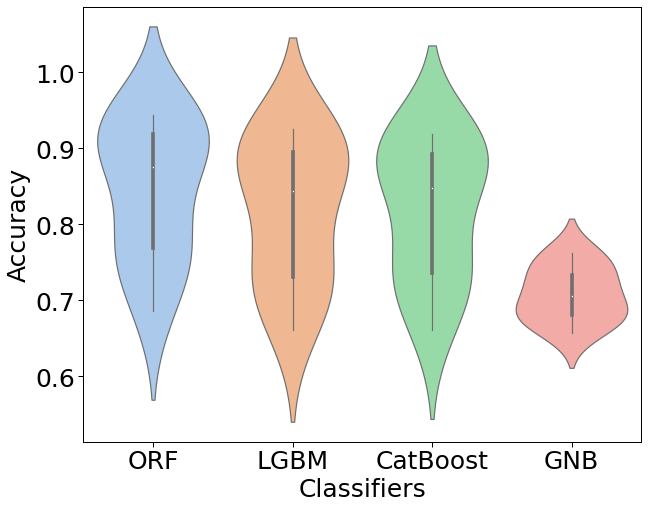

In [89]:

fig, ax = plt.subplots(figsize =(10,8))
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_xlabel('Classifiers',fontsize=25)
ax.set_ylabel('Accuracy',fontsize=25)
sns.violinplot(ax = ax, data = res_df3.iloc[:, 0:4],palette='pastel',scale='width')
plt.savefig(link+'violin_plot_fresh.eps',dpi=600)

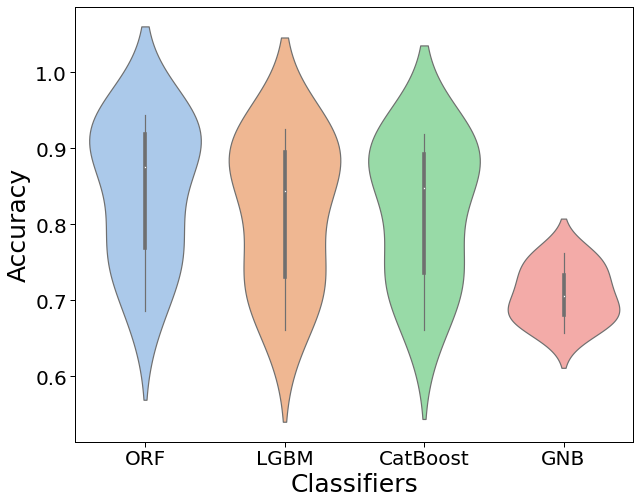

In [90]:

fig, ax = plt.subplots(figsize =(10,8))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

ax.set_xlabel('Classifiers',fontsize=25)
ax.set_ylabel('Accuracy',fontsize=25)
sns.violinplot(ax = ax, data = res_df3.iloc[:, 0:4],palette='pastel',scale='width')
plt.savefig(link+'violin_plot_fresh.png',dpi=600)

In [55]:
X_train1=x_train.reset_index(drop=True)
y_train1=y_train.reset_index(drop=True)
X_test1=x_test.reset_index(drop=True)
y_test1=y_test.reset_index(drop=True)



results_org = bootstrap_model(
    rf1,
    X_train1, 
    y_train1, 
    X_test1, 
    y_test1,
    100,   # change the number of bootstraps here
    0.5
)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


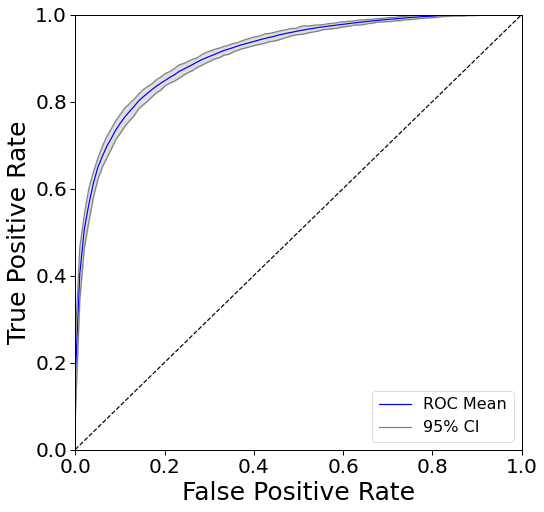

In [56]:
    
total_auc_org = []
for r in results_org['fpr_tpr']:
    total_auc_org.append(auc(r[0], r[1]))
total_auc_org
df_interp_org = pd.DataFrame(roc_interp(results_org['fpr_tpr'])).T
m_org = df_interp_org.mean(axis=1).values.tolist()
ci_org = df_interp_org.quantile([.025, .975], axis=1).values.tolist()

filename_bootstrap_org=link+'Bootstrap_ROC_C_section_fresh.eps'
plot_bootstrap_roc(m_org, ci_org,filename_bootstrap_org)

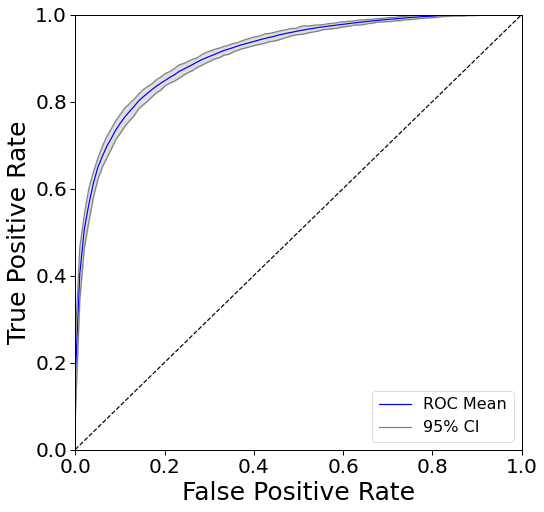

In [57]:
filename_bootstrap_org=link+'Bootstrap_ROC_C_section_fresh.png'
plot_bootstrap_roc(m_org, ci_org,filename_bootstrap_org)

In [91]:
df_pred33=pd.DataFrame(proba_dic)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


ORF
  AUC: 0.914
LGBM
  AUC: 0.905
CatBoost
  AUC: 0.908
GNB
  AUC: 0.792


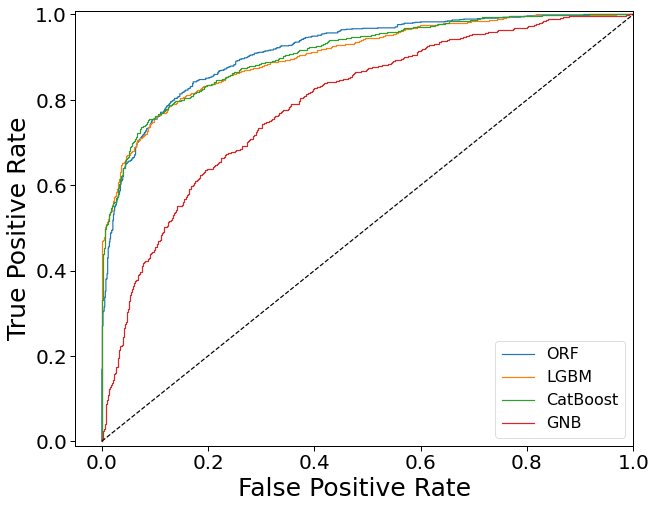

In [93]:
filename=link+'ROC_curve_CS.eps'
plot_roc_curves(df_pred33, y_test,filename)

In [94]:
proba_R_D_curve=dict(
    ORF= rf1.predict_proba(x_test),
    LGBM=lgbm1.predict_proba(x_test),
    
    CatBoost=cat_clf.predict_proba(x_test),
    GNB=gbc_clf.predict_proba(x_test)
   
   
                                         
)

In [99]:
%run mirazul_ploting_utils_changed.ipynb

C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dodul\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


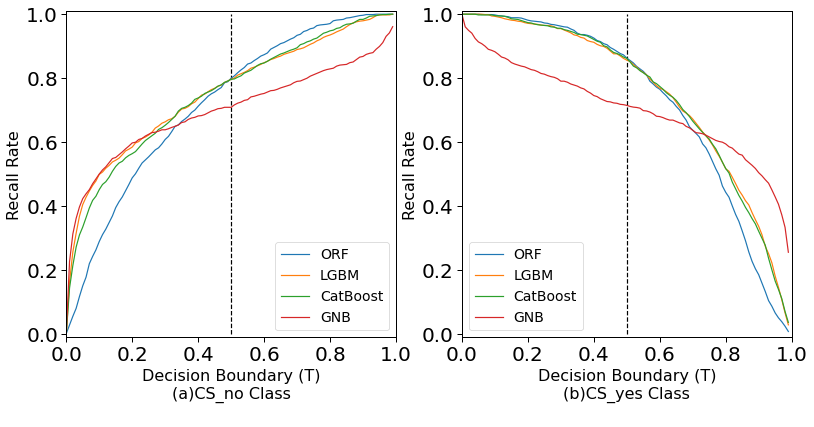

In [101]:
filename=link+'multi_recall_vs_decision_boundary_CS.png'
plot_multi_recall_vs_decision_boundary(proba_R_D_curve, y_test,filename)